# MOGDx 

In [1]:
import pandas as pd
import numpy as np
import os
import sys 

sys.path.insert(0 , './../')
from MAIN.utils import *
from MAIN.train import *
import MAIN.preprocess_functions
from MAIN.GNN_MME import GCN_MME , GSage_MME , GAT_MME

from Modules.PNetTorch.MAIN.reactome import ReactomeNetwork
from Modules.PNetTorch.MAIN.Pnet import MaskedLinear , PNET
from Modules.PNetTorch.MAIN.utils import numpy_array_to_one_hot, get_gpu_memory
from Modules.PNetTorch.MAIN.interpret import interpret , evaluate_interpret_save , visualize_importances

import torch
import torch.nn.functional as F
import dgl
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
import networkx as nx
from datetime import datetime
import joblib
import warnings
import gc

warnings.filterwarnings("ignore")

print("Finished Library Import \n")

Finished Library Import 



In [2]:
data_input = './../../data/TCGA/BRCA/raw/'
snf_net = 'RPPA_mRNA_graph.graphml'
index_col = 'index'
target = 'paper_BRCA_Subtype_PAM50'
interpret_feat = True

In [3]:
# List of cancer genes was taken from the PNet paper dataset
genes = pd.read_csv('./../../data/ext_data/cancer_genes.txt', header=0)

# Build network to obtain gene and pathway relationships
net = ReactomeNetwork(genes_of_interest=np.unique(list(genes['genes'].values)) , n_levels=5)

Using cuda device
Total = 11.5Gb 	 Reserved = 1.2Gb 	 Allocated = 0.4Gb
StratifiedKFold(n_splits=5, random_state=None, shuffle=True)
GSage_MME(
  (encoder_dims): ModuleList(
    (0): PNET(
      (dropout): Dropout(p=0.5, inplace=False)
      (layers): ModuleList(
        (0): Linear(in_features=464, out_features=723, bias=True)
        (1): MaskedLinear(in_features=723, out_features=1613, bias=True)
        (2): MaskedLinear(in_features=1613, out_features=1107, bias=True)
        (3): MaskedLinear(in_features=1107, out_features=488, bias=True)
        (4): MaskedLinear(in_features=488, out_features=159, bias=True)
        (5): MaskedLinear(in_features=159, out_features=28, bias=True)
      )
      (skip): ModuleList(
        (0): Linear(in_features=723, out_features=32, bias=True)
        (1): Linear(in_features=1613, out_features=32, bias=True)
        (2): Linear(in_features=1107, out_features=32, bias=True)
        (3): Linear(in_features=488, out_features=32, bias=True)
        (4)

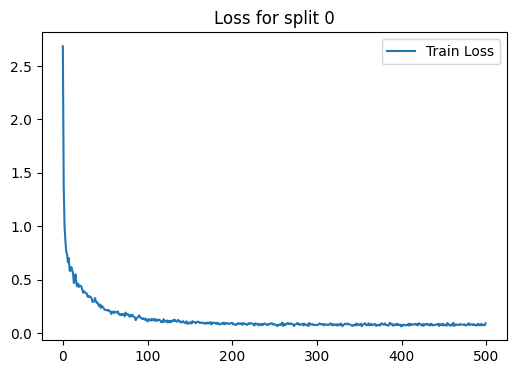

Fold : 1 | Test Accuracy = 0.8519 | F1 = 0.8223 
Save Path Not Found - Plots will not be saved


<Figure size 640x480 with 0 Axes>

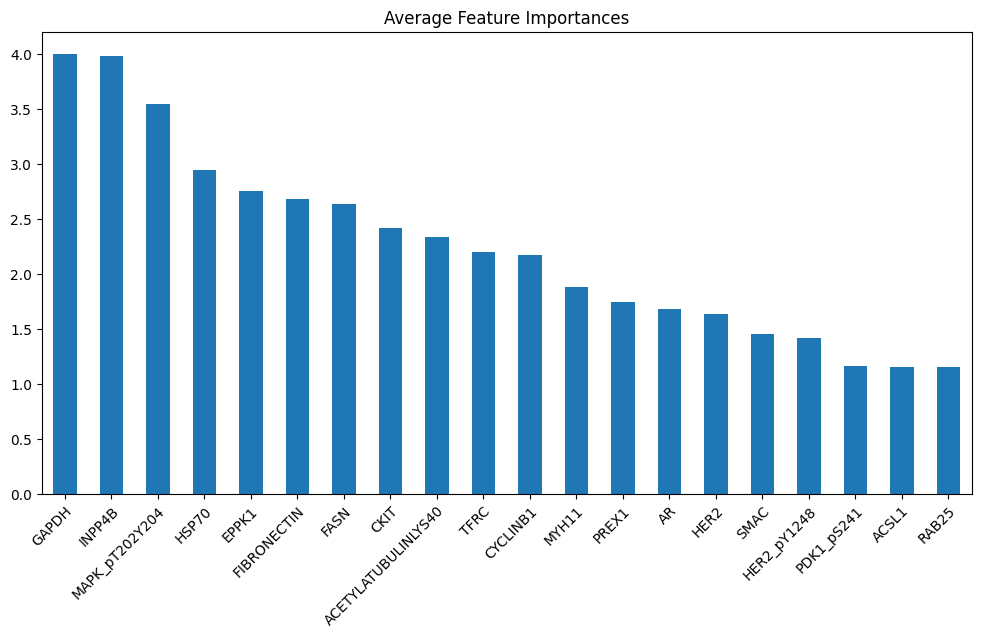

Linear(in_features=464, out_features=723, bias=True)
MaskedLinear(in_features=723, out_features=1613, bias=True)
MaskedLinear(in_features=1613, out_features=1107, bias=True)
MaskedLinear(in_features=1107, out_features=488, bias=True)
MaskedLinear(in_features=488, out_features=159, bias=True)
MaskedLinear(in_features=159, out_features=28, bias=True)


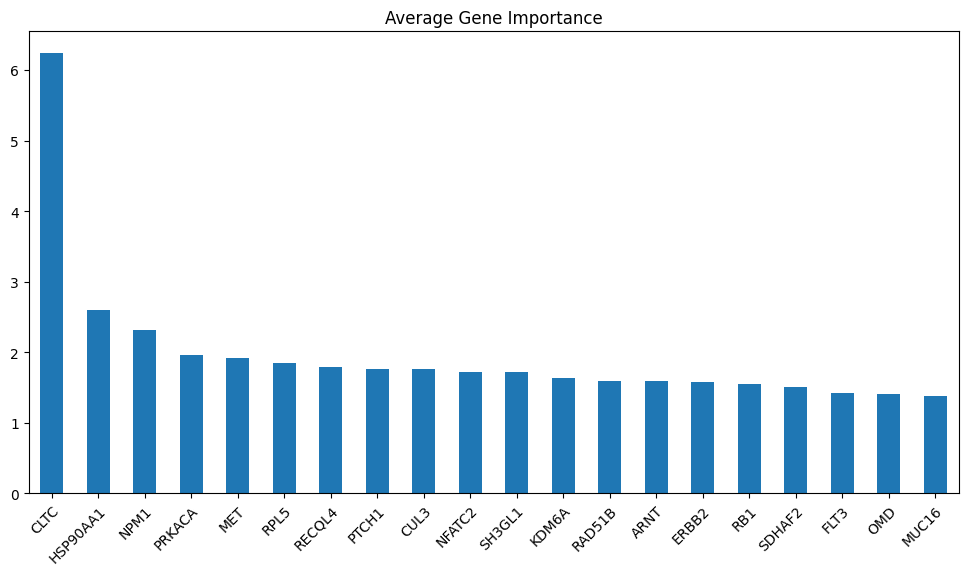

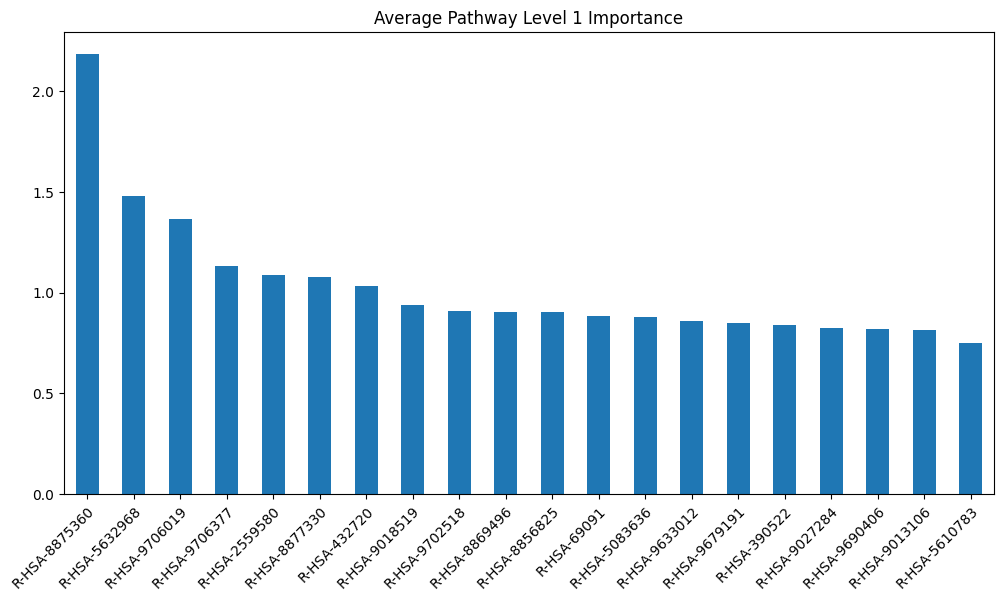

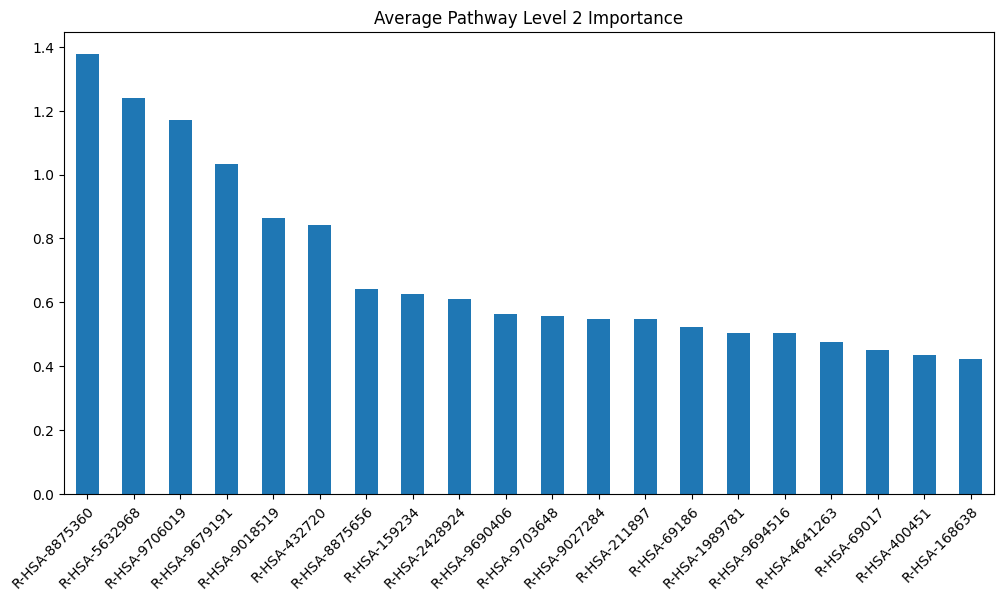

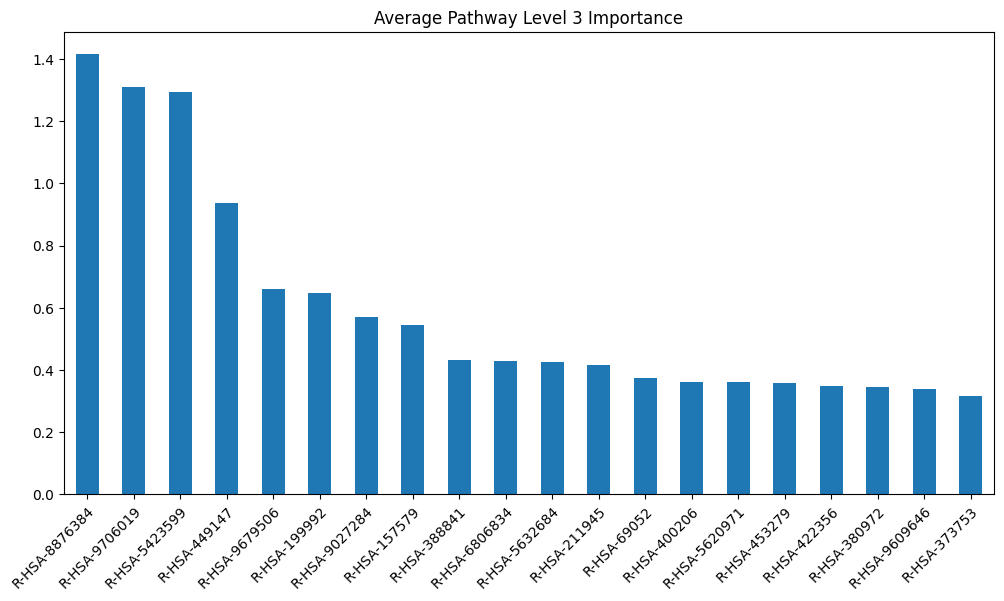

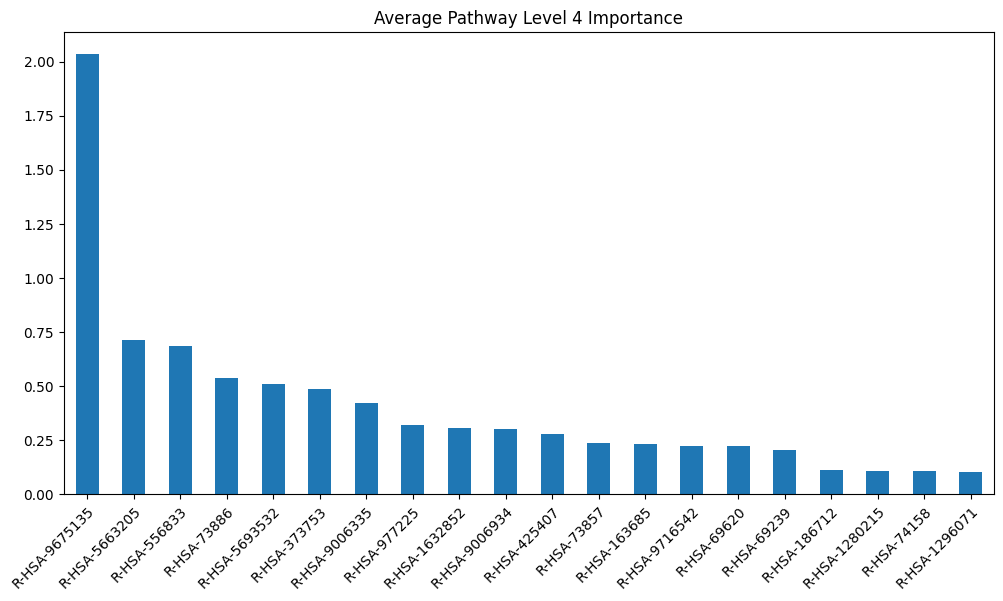

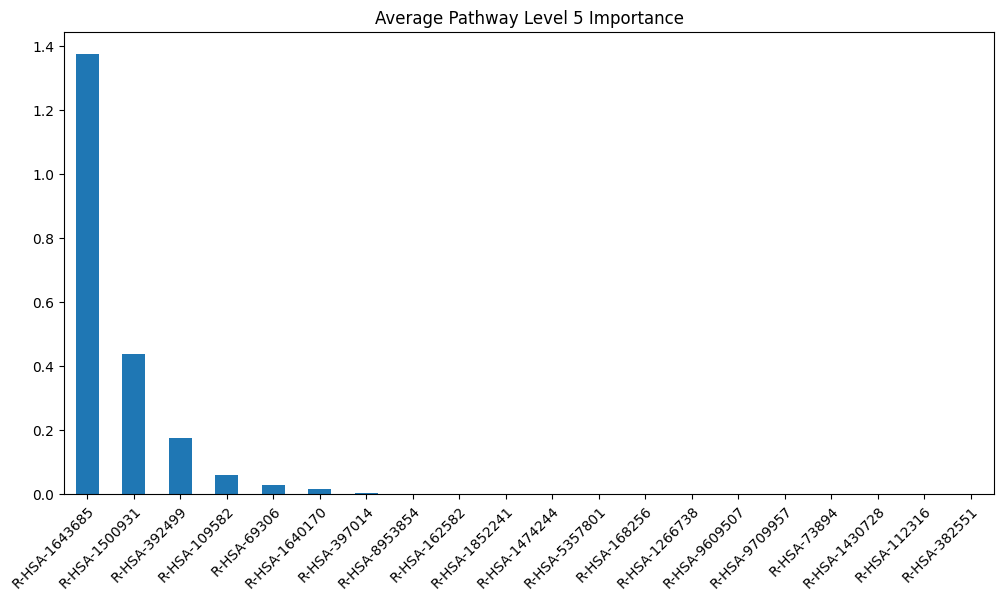

Save Path Not Found - Plots will not be saved


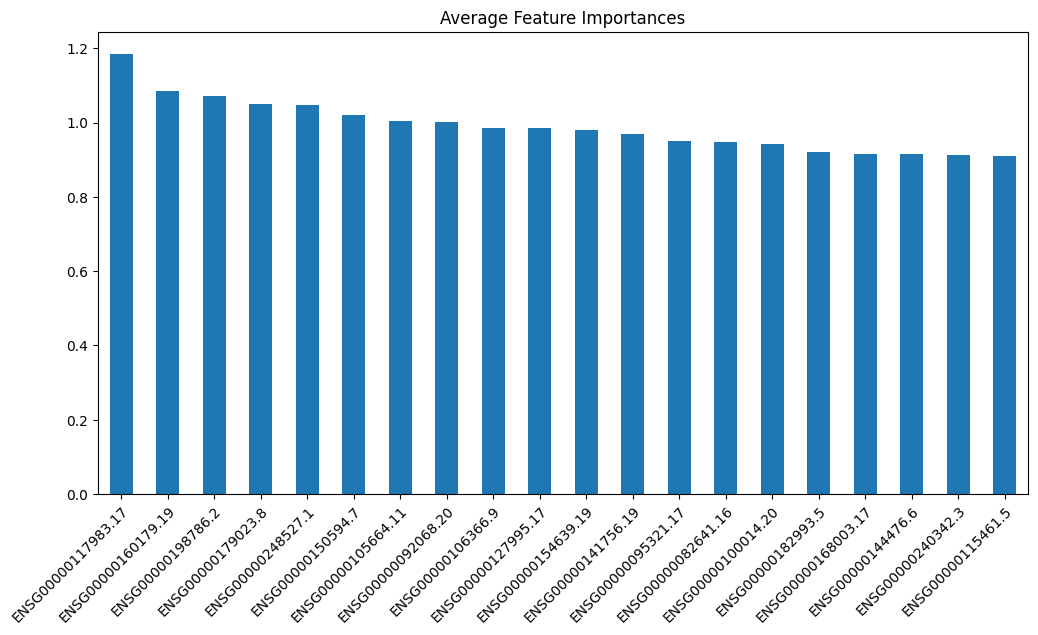

Linear(in_features=29995, out_features=723, bias=True)
MaskedLinear(in_features=723, out_features=1613, bias=True)
MaskedLinear(in_features=1613, out_features=1107, bias=True)
MaskedLinear(in_features=1107, out_features=488, bias=True)
MaskedLinear(in_features=488, out_features=159, bias=True)
MaskedLinear(in_features=159, out_features=28, bias=True)


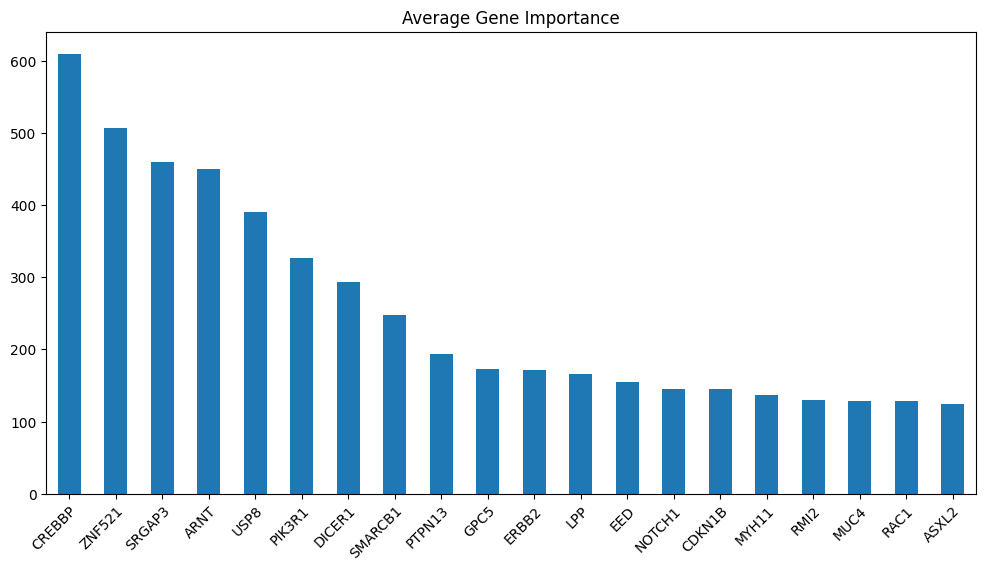

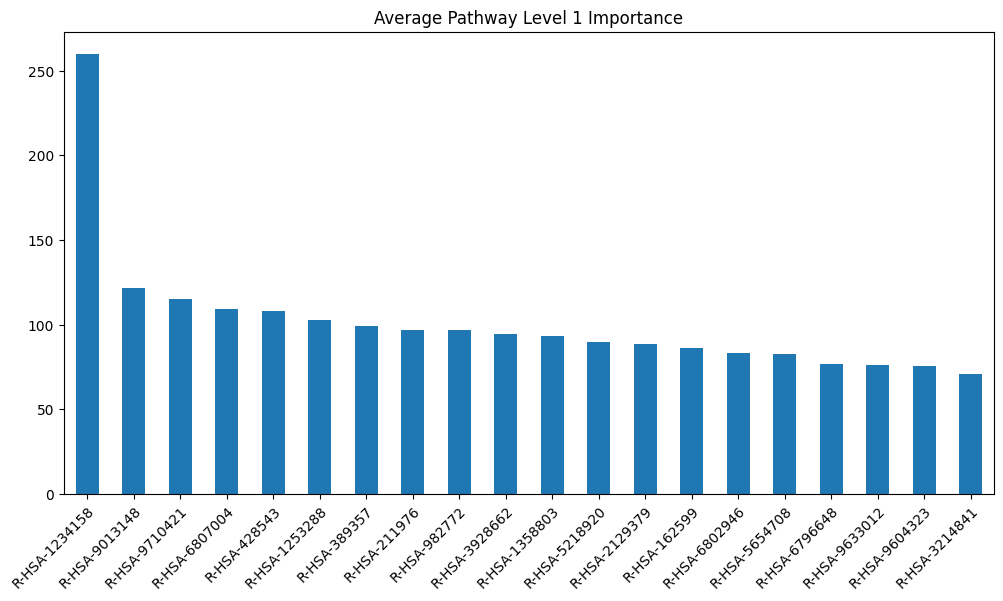

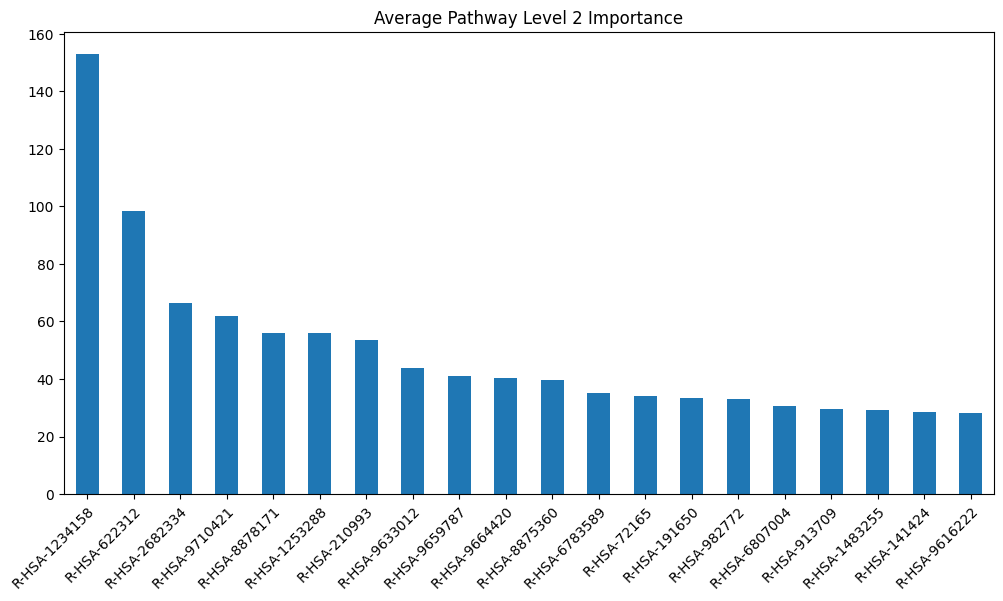

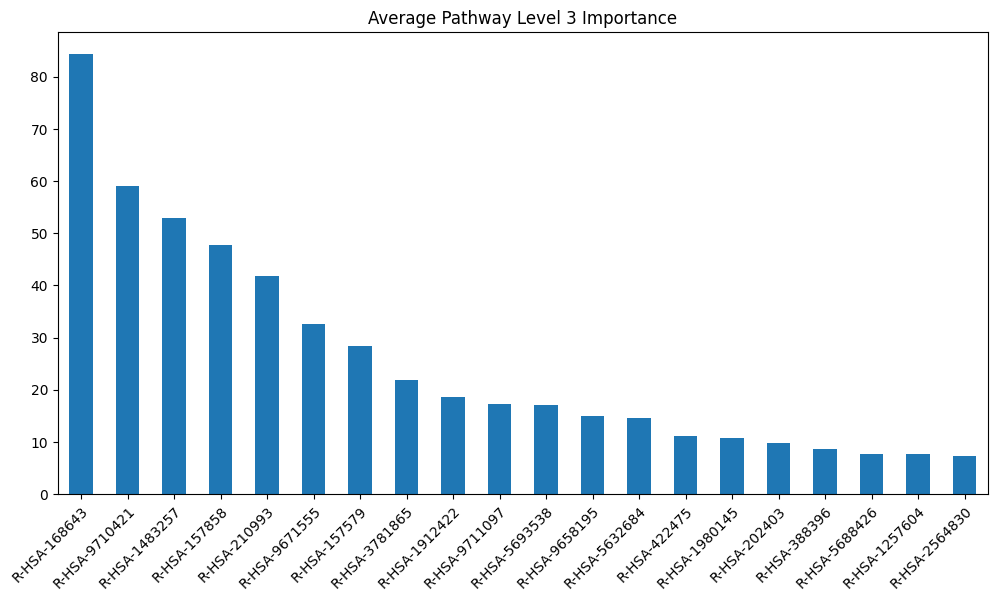

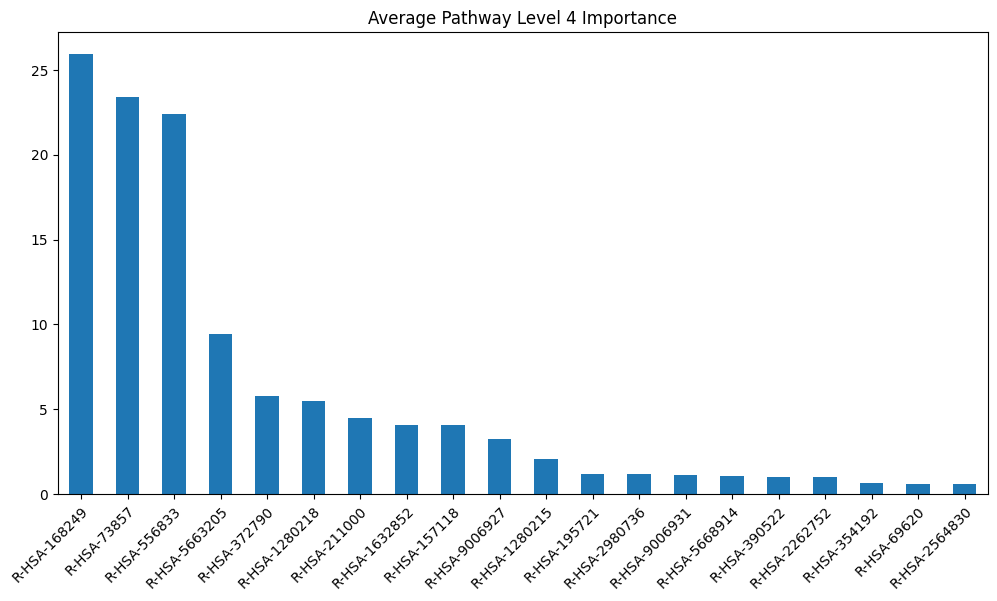

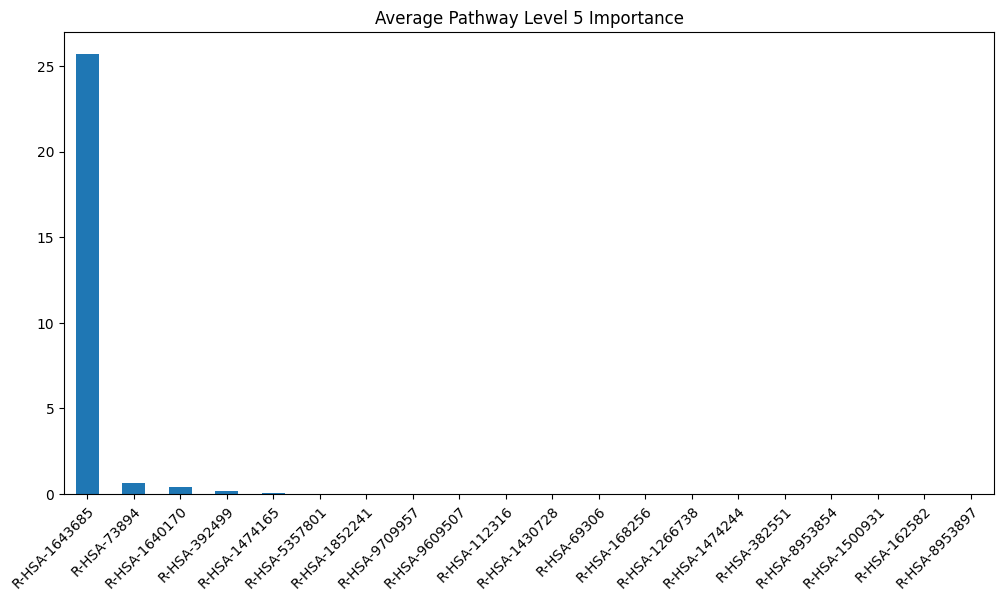

Total = 11.5Gb 	 Reserved = 1.6Gb 	 Allocated = 0.4Gb
Clearing gpu memory
Total = 11.5Gb 	 Reserved = 1.2Gb 	 Allocated = 0.4Gb
GSage_MME(
  (encoder_dims): ModuleList(
    (0): PNET(
      (dropout): Dropout(p=0.5, inplace=False)
      (layers): ModuleList(
        (0): Linear(in_features=464, out_features=723, bias=True)
        (1): MaskedLinear(in_features=723, out_features=1613, bias=True)
        (2): MaskedLinear(in_features=1613, out_features=1107, bias=True)
        (3): MaskedLinear(in_features=1107, out_features=488, bias=True)
        (4): MaskedLinear(in_features=488, out_features=159, bias=True)
        (5): MaskedLinear(in_features=159, out_features=28, bias=True)
      )
      (skip): ModuleList(
        (0): Linear(in_features=723, out_features=32, bias=True)
        (1): Linear(in_features=1613, out_features=32, bias=True)
        (2): Linear(in_features=1107, out_features=32, bias=True)
        (3): Linear(in_features=488, out_features=32, bias=True)
        (4): Lin

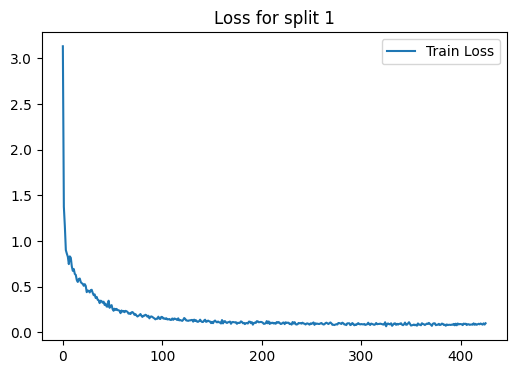

Fold : 2 | Test Accuracy = 0.8651 | F1 = 0.8308 
Save Path Not Found - Plots will not be saved


<Figure size 640x480 with 0 Axes>

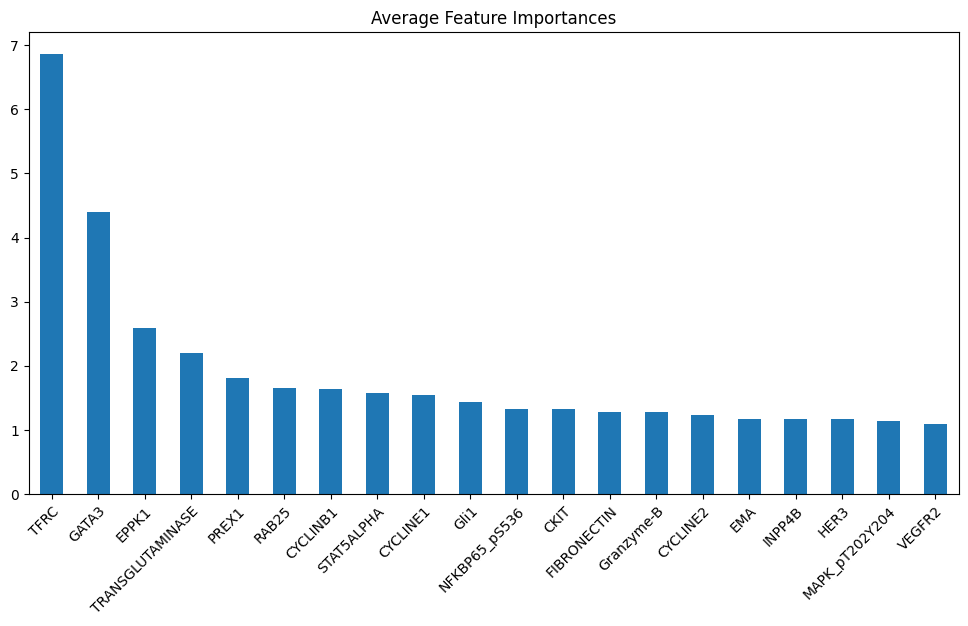

Linear(in_features=464, out_features=723, bias=True)
MaskedLinear(in_features=723, out_features=1613, bias=True)
MaskedLinear(in_features=1613, out_features=1107, bias=True)
MaskedLinear(in_features=1107, out_features=488, bias=True)
MaskedLinear(in_features=488, out_features=159, bias=True)
MaskedLinear(in_features=159, out_features=28, bias=True)


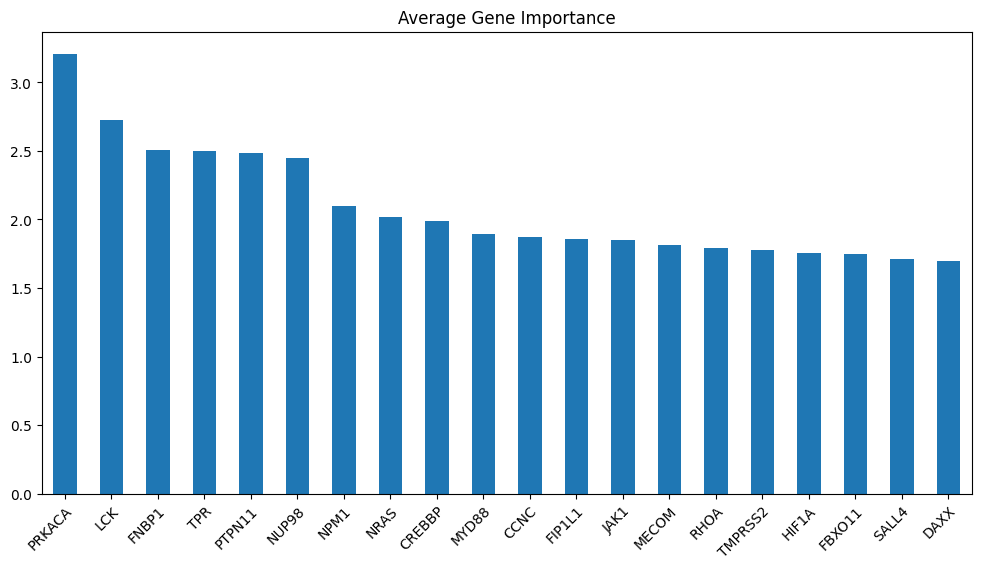

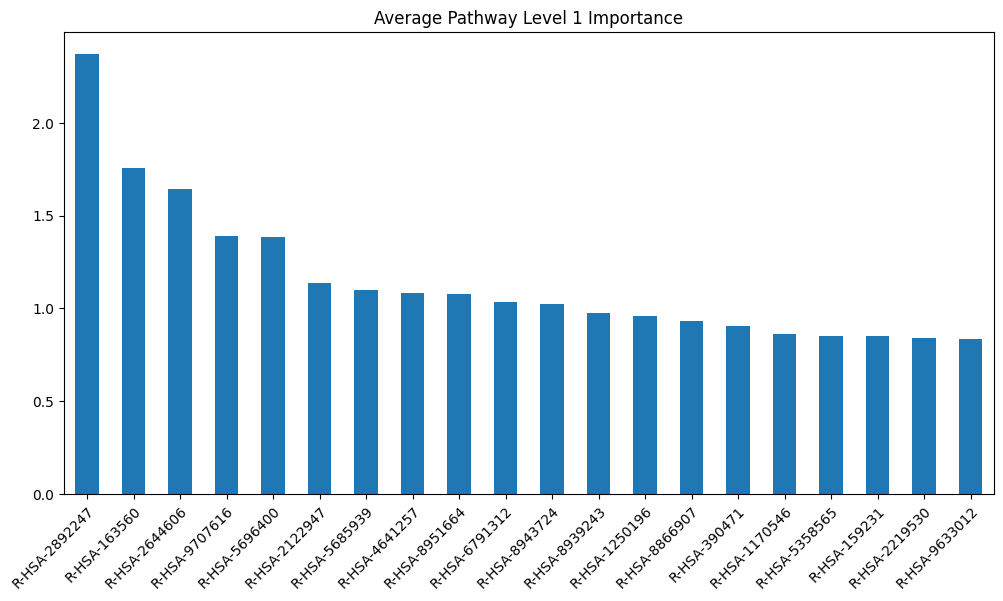

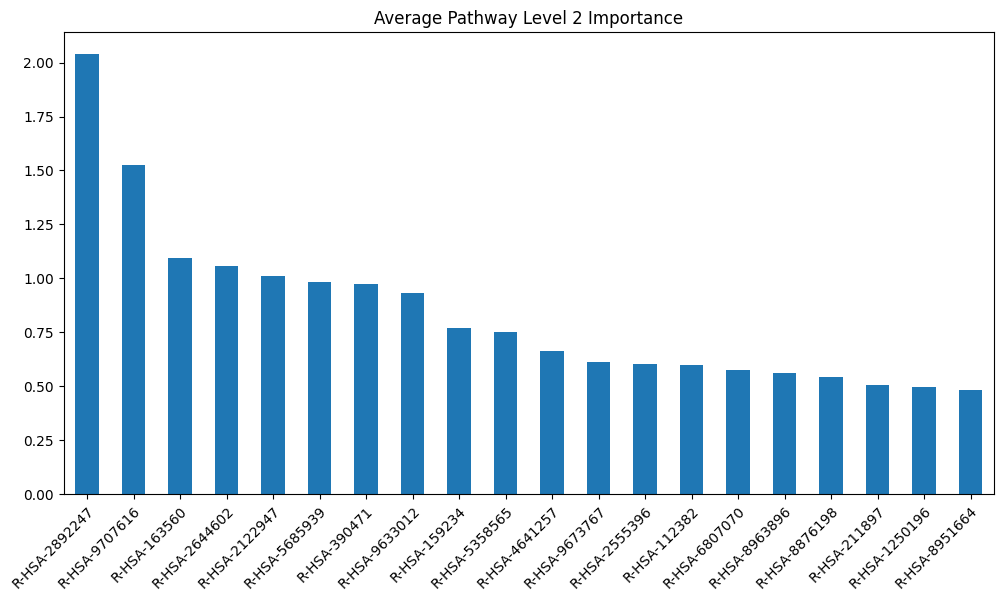

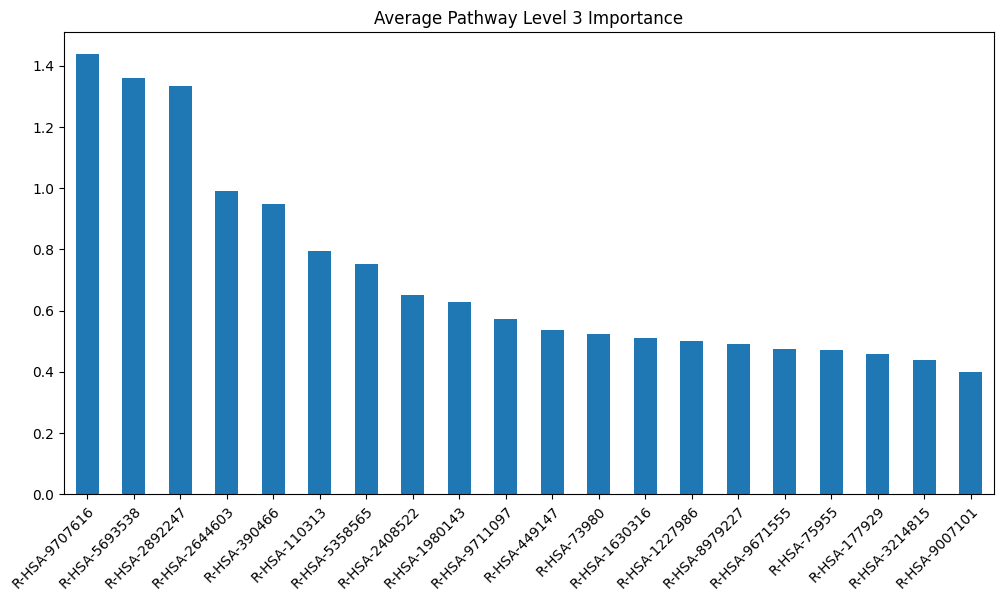

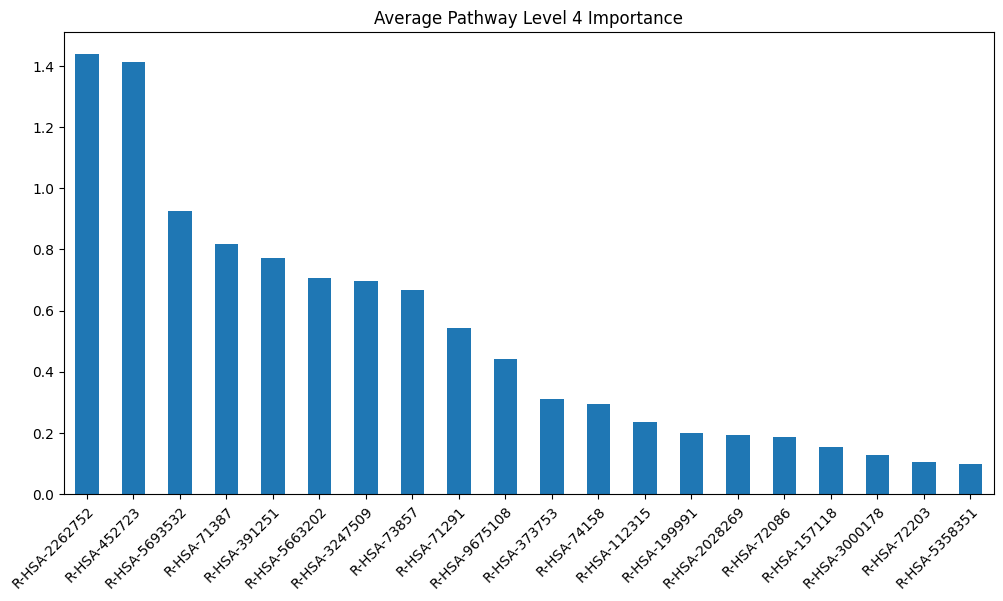

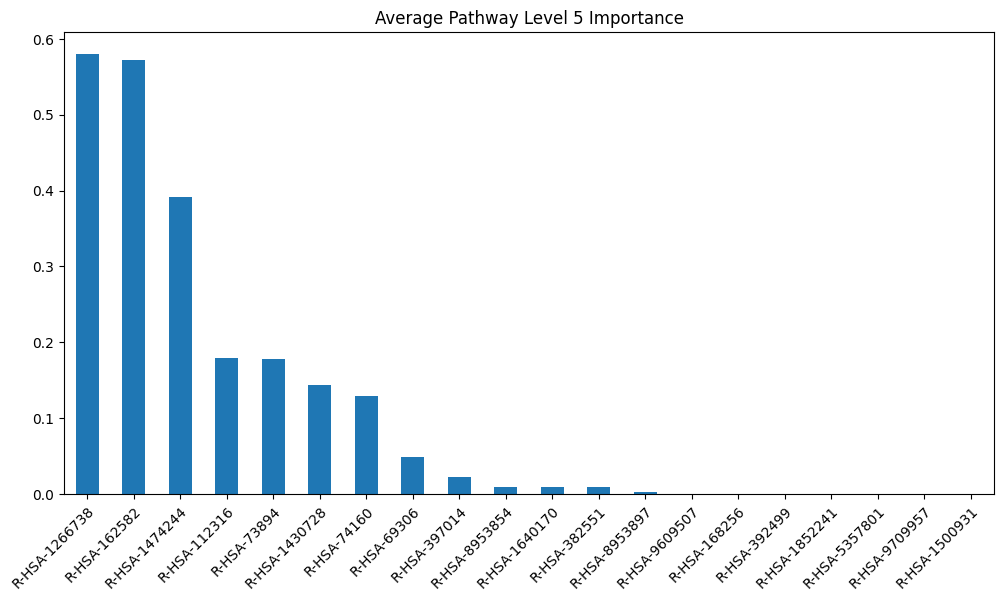

Save Path Not Found - Plots will not be saved


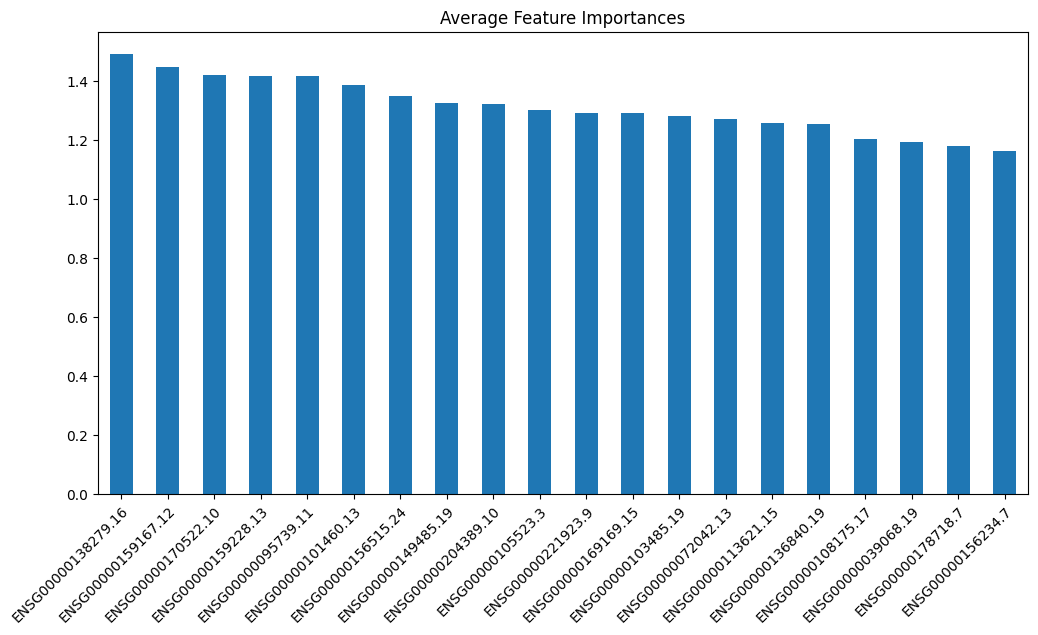

Linear(in_features=29995, out_features=723, bias=True)
MaskedLinear(in_features=723, out_features=1613, bias=True)
MaskedLinear(in_features=1613, out_features=1107, bias=True)
MaskedLinear(in_features=1107, out_features=488, bias=True)
MaskedLinear(in_features=488, out_features=159, bias=True)
MaskedLinear(in_features=159, out_features=28, bias=True)


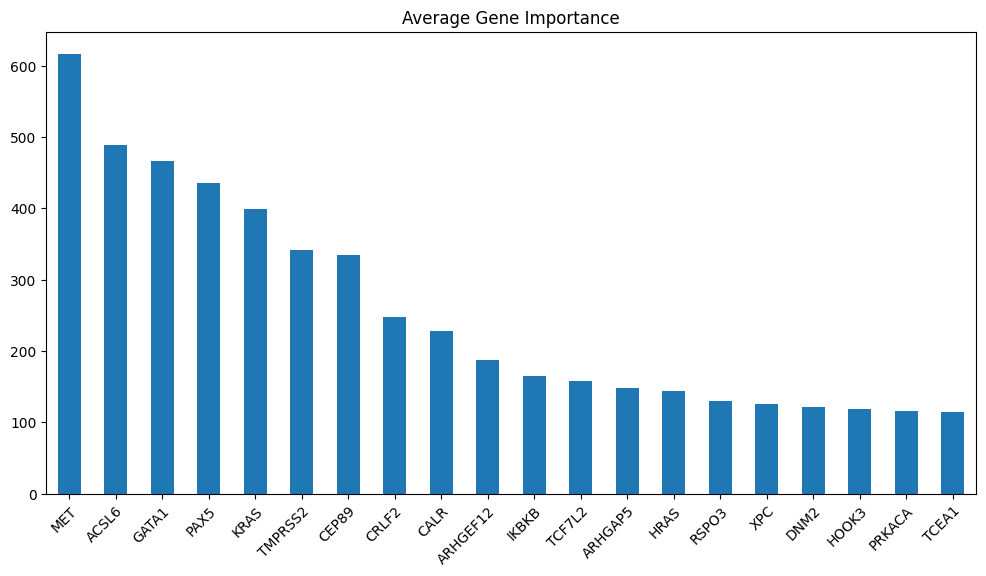

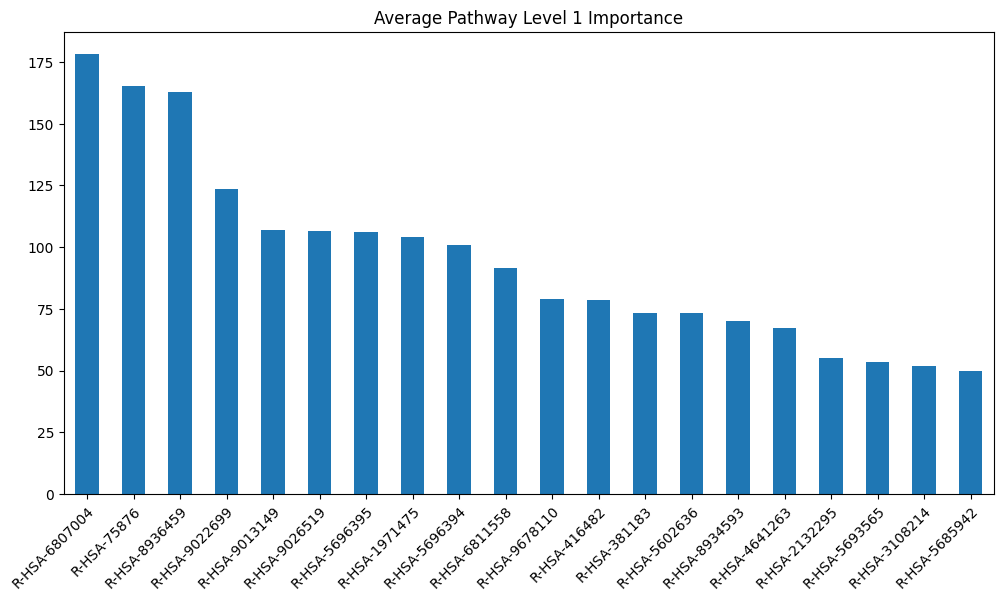

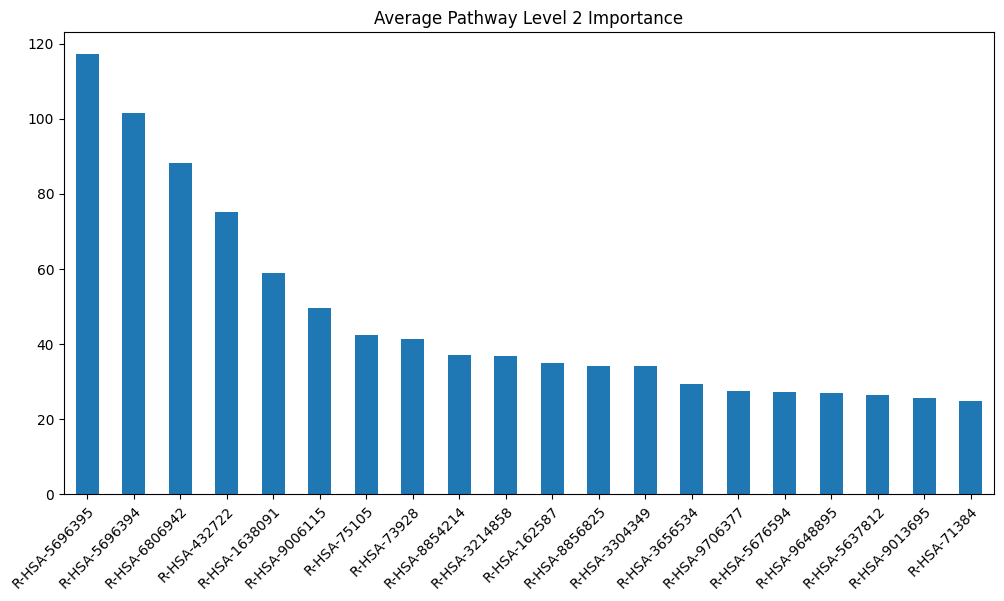

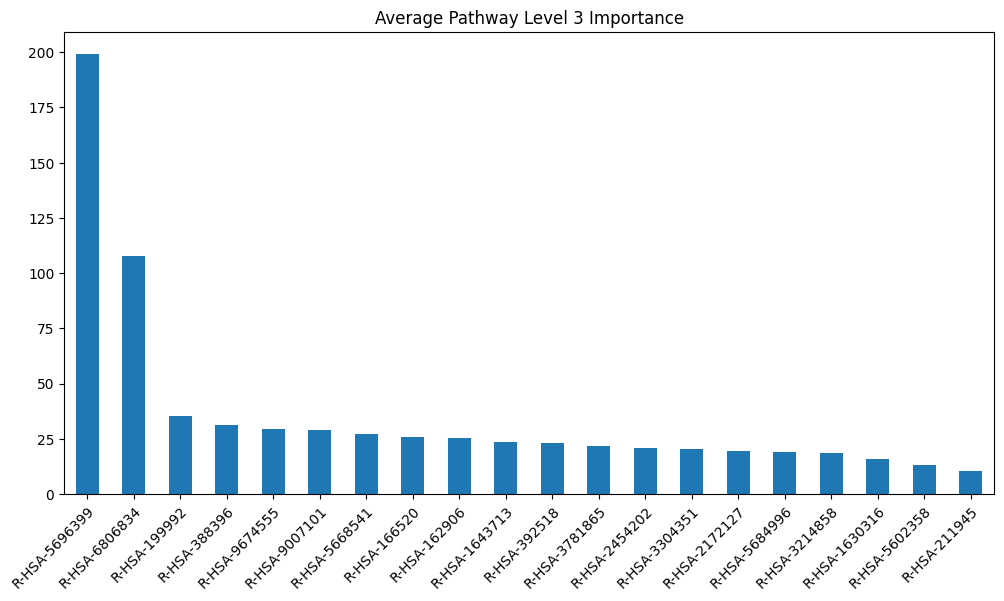

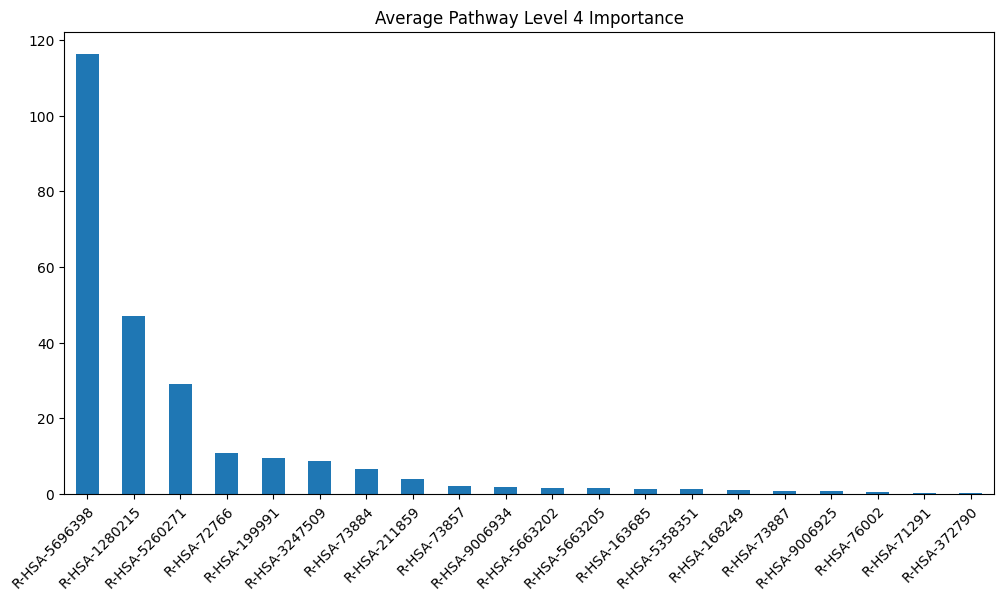

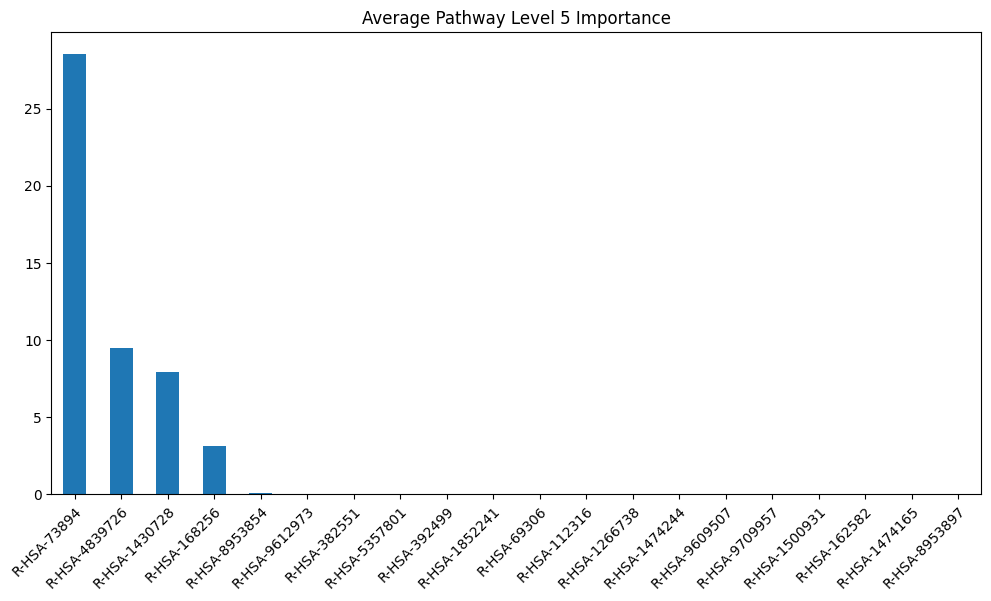

Total = 11.5Gb 	 Reserved = 1.4Gb 	 Allocated = 0.4Gb
Clearing gpu memory
Total = 11.5Gb 	 Reserved = 1.0Gb 	 Allocated = 0.4Gb
GSage_MME(
  (encoder_dims): ModuleList(
    (0): PNET(
      (dropout): Dropout(p=0.5, inplace=False)
      (layers): ModuleList(
        (0): Linear(in_features=464, out_features=723, bias=True)
        (1): MaskedLinear(in_features=723, out_features=1613, bias=True)
        (2): MaskedLinear(in_features=1613, out_features=1107, bias=True)
        (3): MaskedLinear(in_features=1107, out_features=488, bias=True)
        (4): MaskedLinear(in_features=488, out_features=159, bias=True)
        (5): MaskedLinear(in_features=159, out_features=28, bias=True)
      )
      (skip): ModuleList(
        (0): Linear(in_features=723, out_features=32, bias=True)
        (1): Linear(in_features=1613, out_features=32, bias=True)
        (2): Linear(in_features=1107, out_features=32, bias=True)
        (3): Linear(in_features=488, out_features=32, bias=True)
        (4): Lin

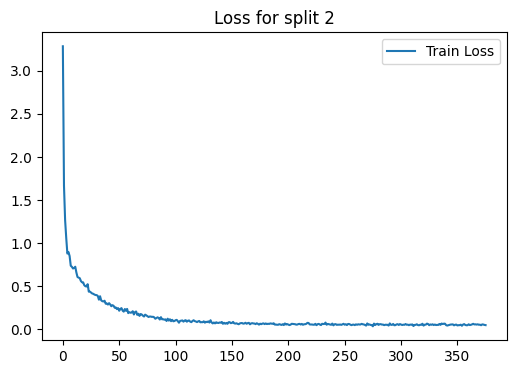

Fold : 3 | Test Accuracy = 0.8512 | F1 = 0.8110 
Save Path Not Found - Plots will not be saved


<Figure size 640x480 with 0 Axes>

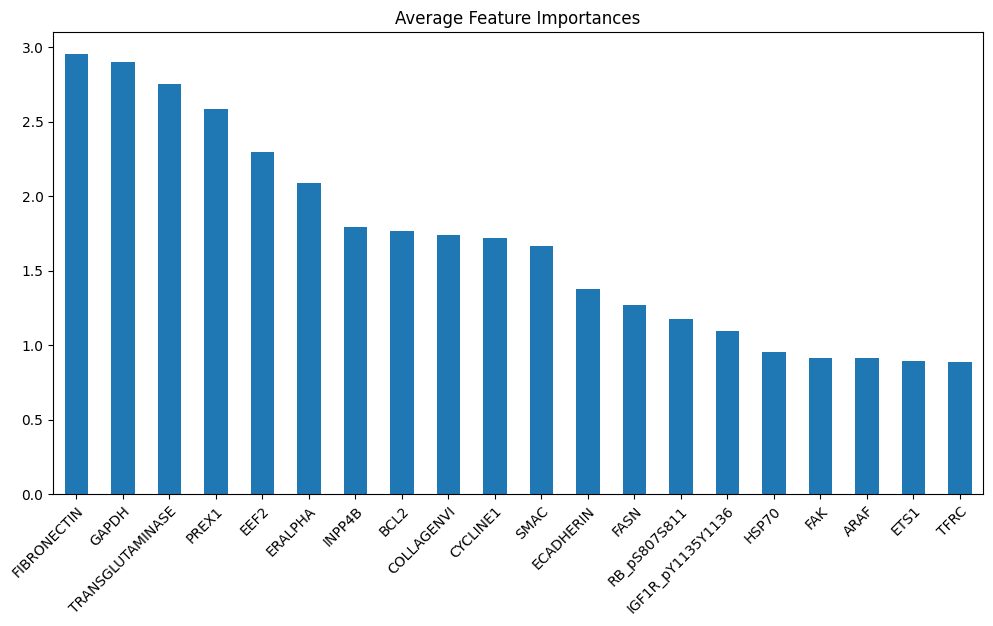

Linear(in_features=464, out_features=723, bias=True)
MaskedLinear(in_features=723, out_features=1613, bias=True)
MaskedLinear(in_features=1613, out_features=1107, bias=True)
MaskedLinear(in_features=1107, out_features=488, bias=True)
MaskedLinear(in_features=488, out_features=159, bias=True)
MaskedLinear(in_features=159, out_features=28, bias=True)


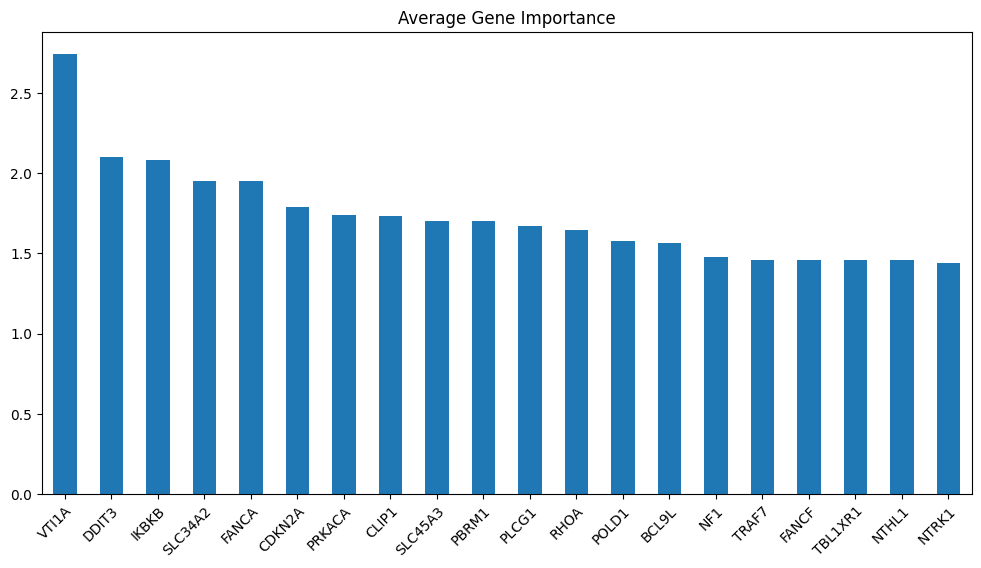

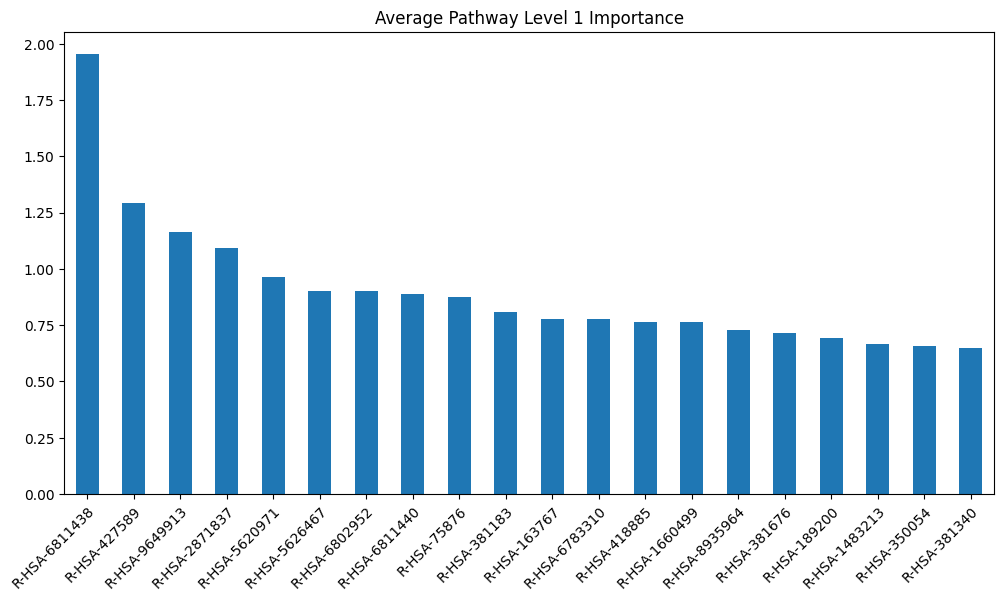

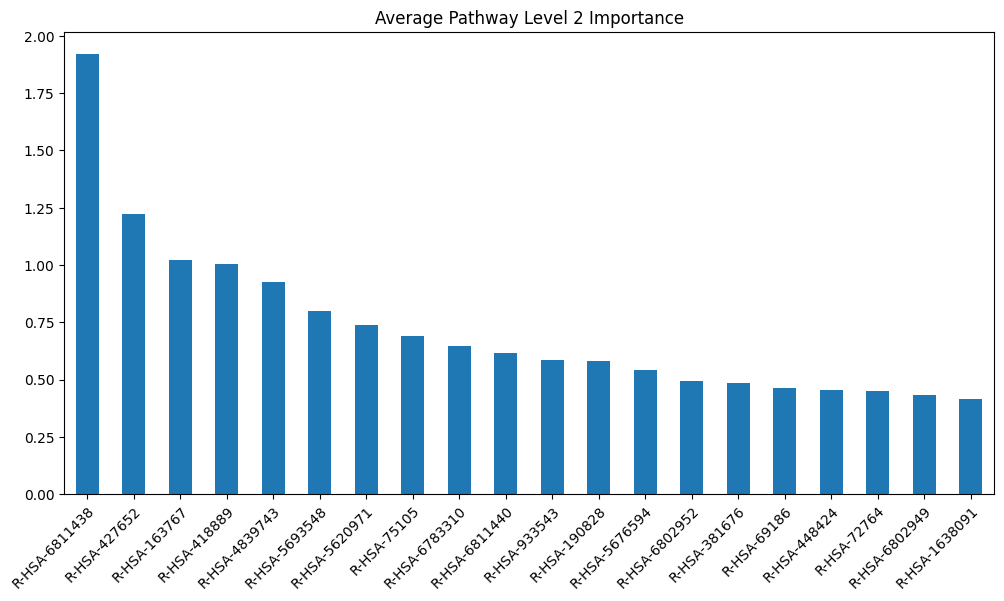

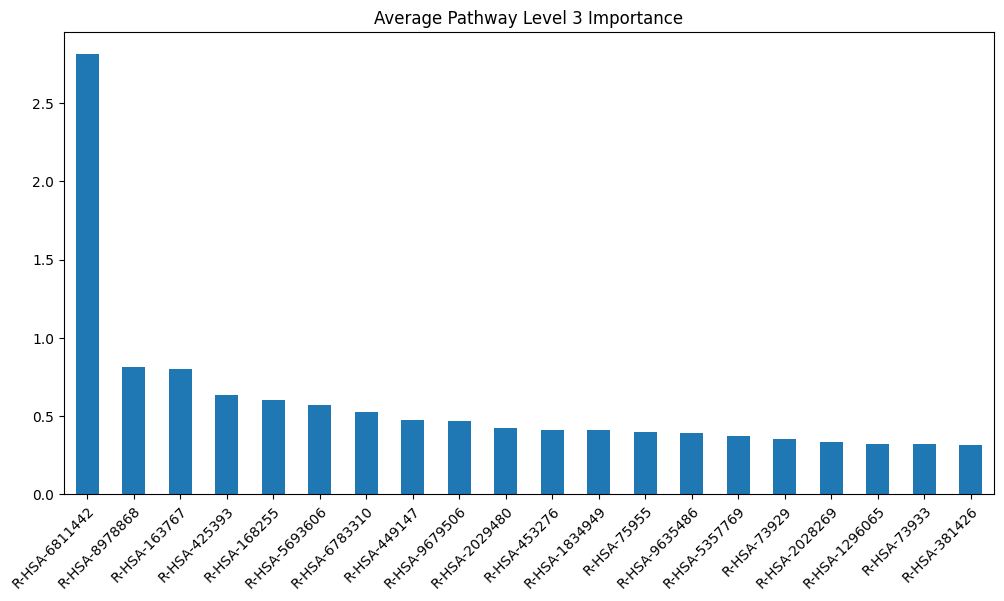

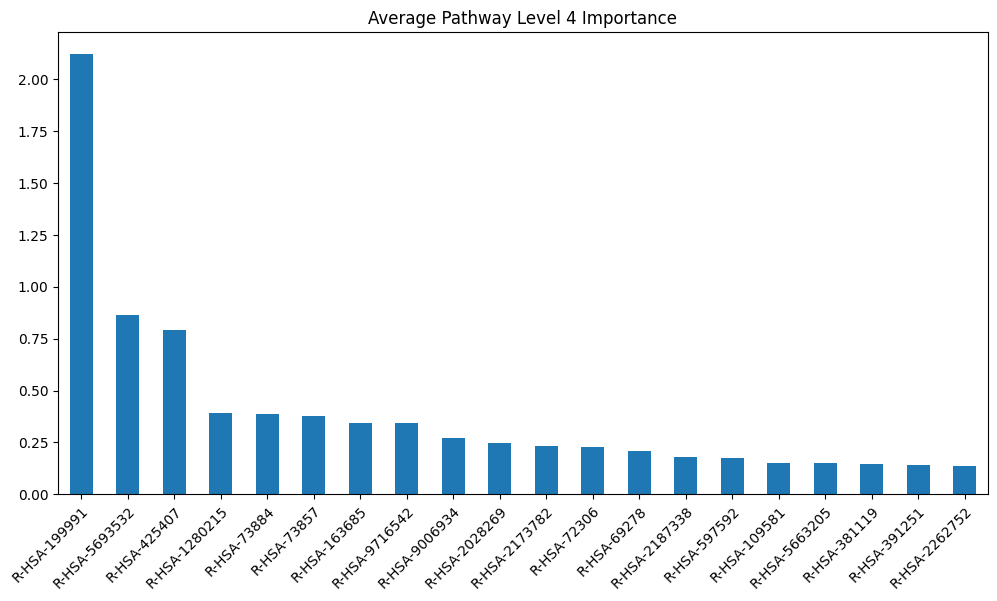

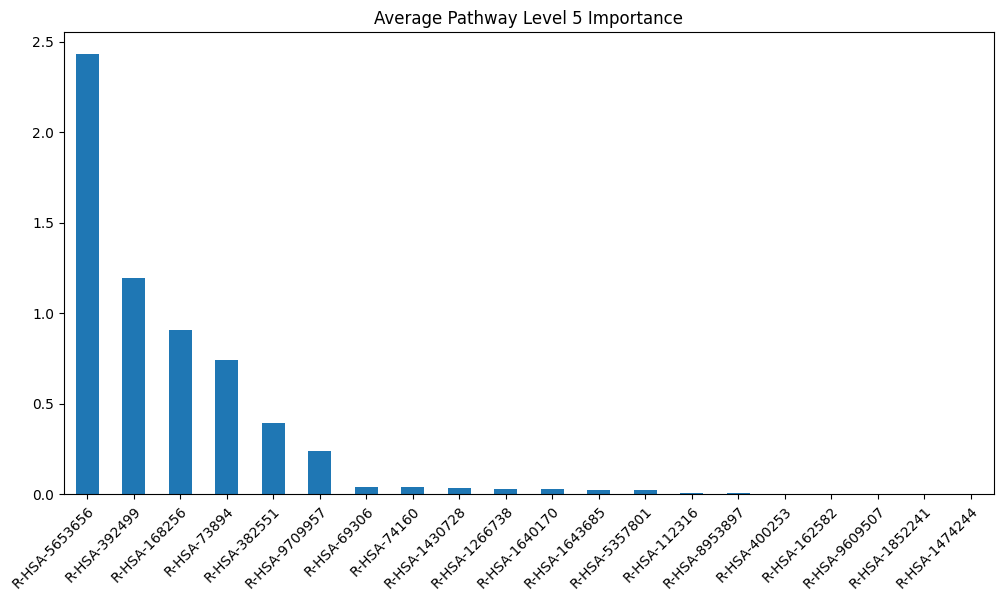

Save Path Not Found - Plots will not be saved


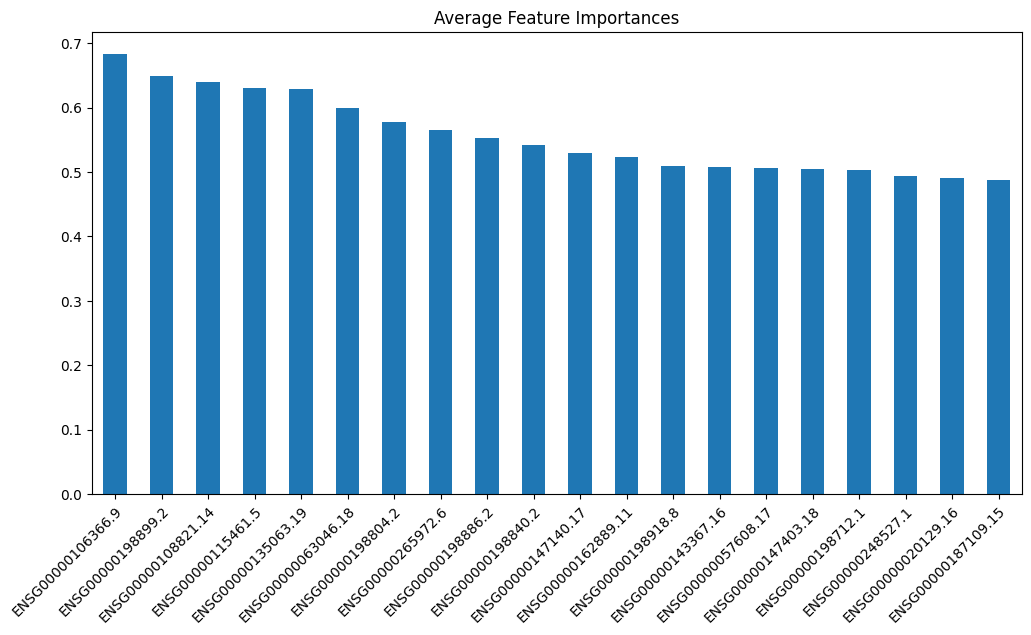

Linear(in_features=29995, out_features=723, bias=True)
MaskedLinear(in_features=723, out_features=1613, bias=True)
MaskedLinear(in_features=1613, out_features=1107, bias=True)
MaskedLinear(in_features=1107, out_features=488, bias=True)
MaskedLinear(in_features=488, out_features=159, bias=True)
MaskedLinear(in_features=159, out_features=28, bias=True)


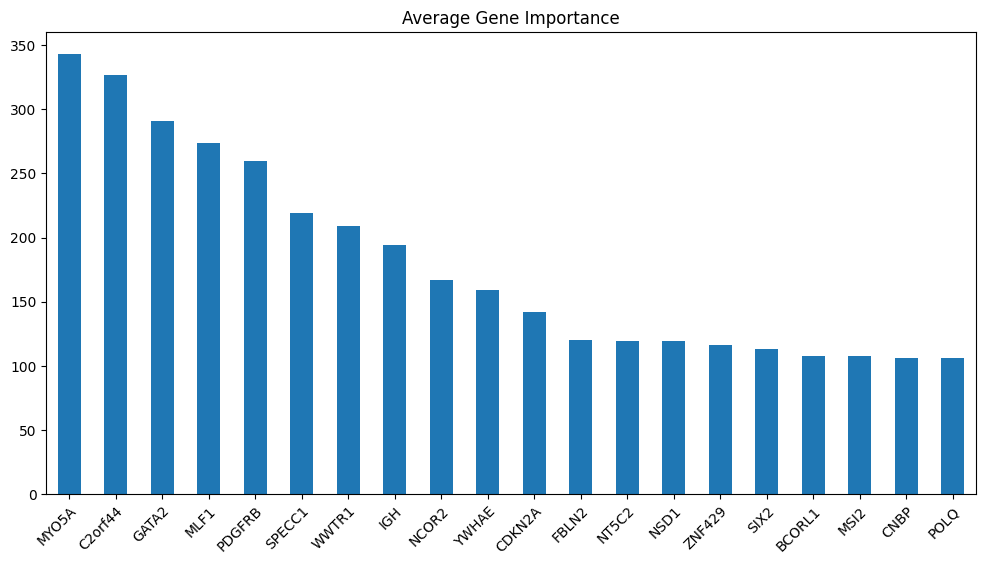

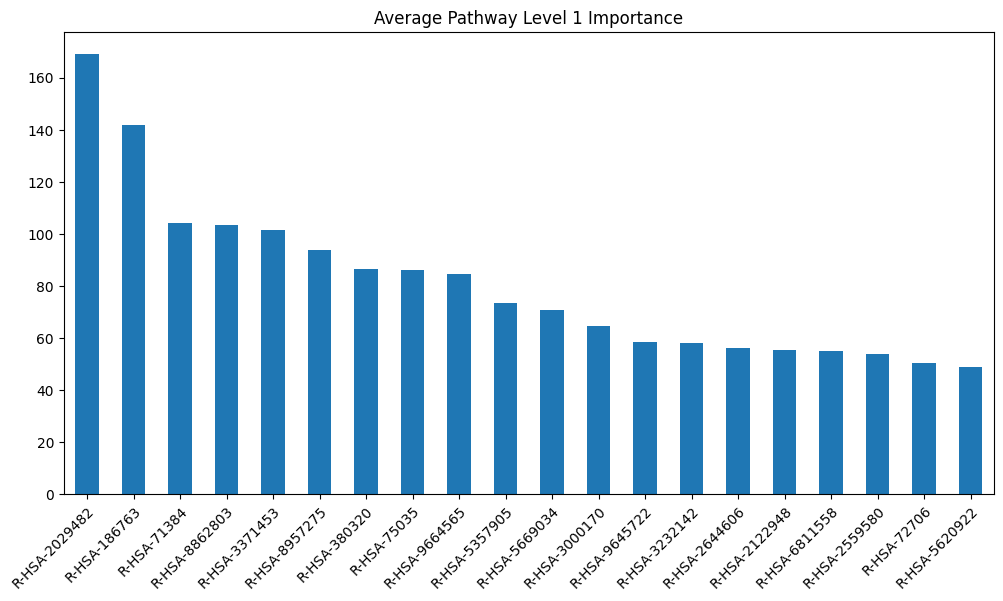

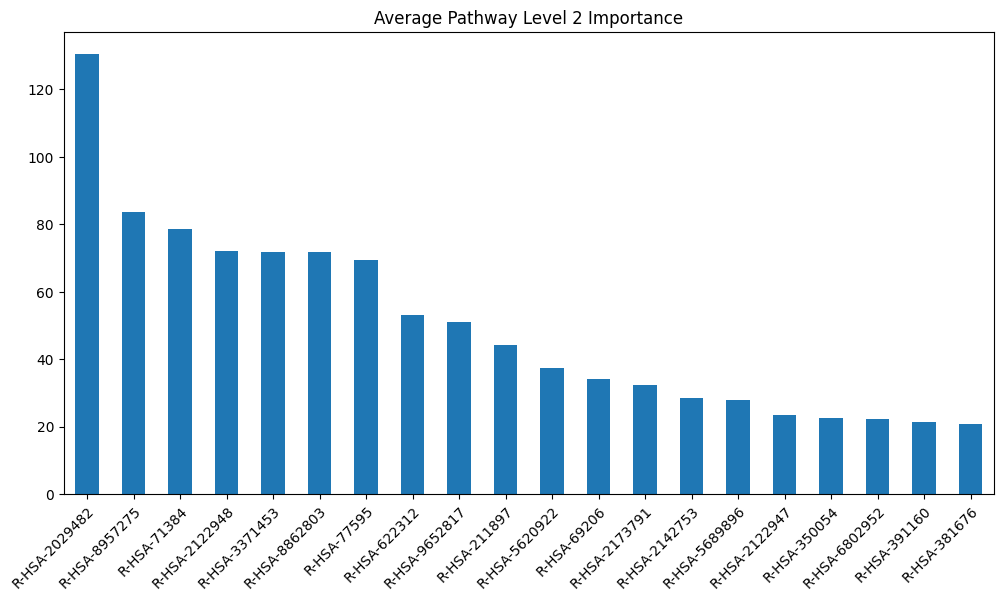

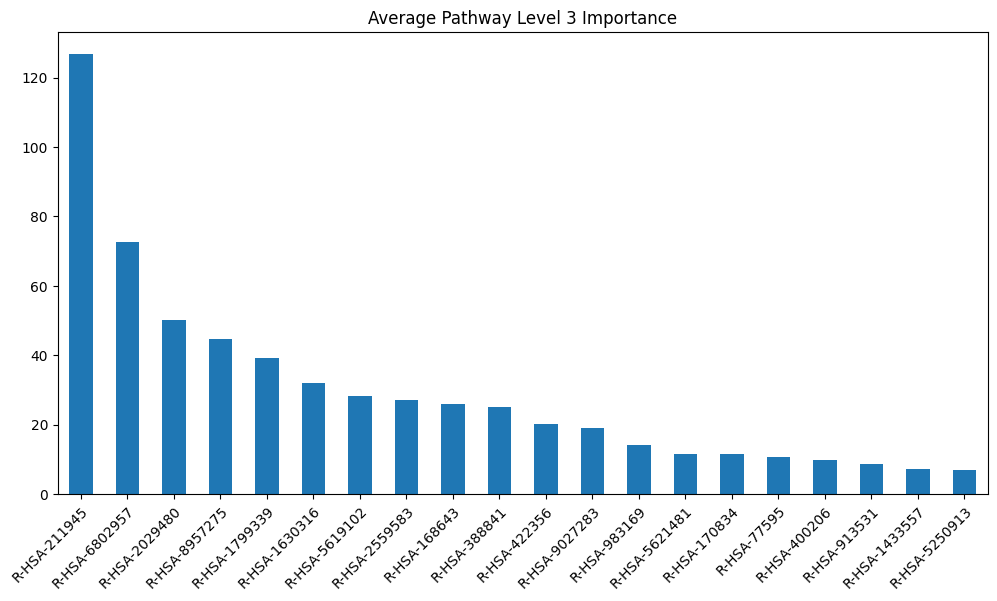

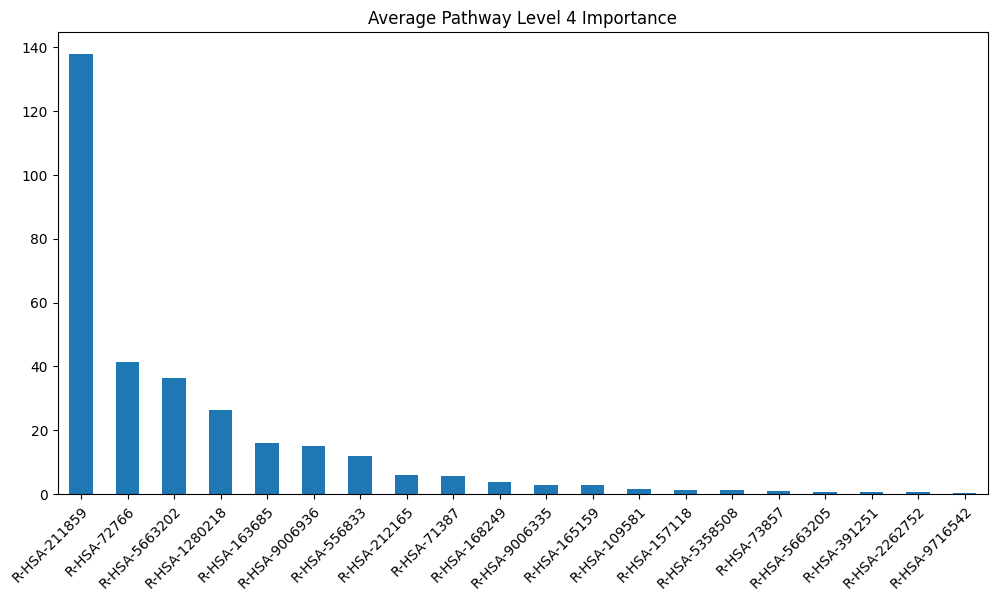

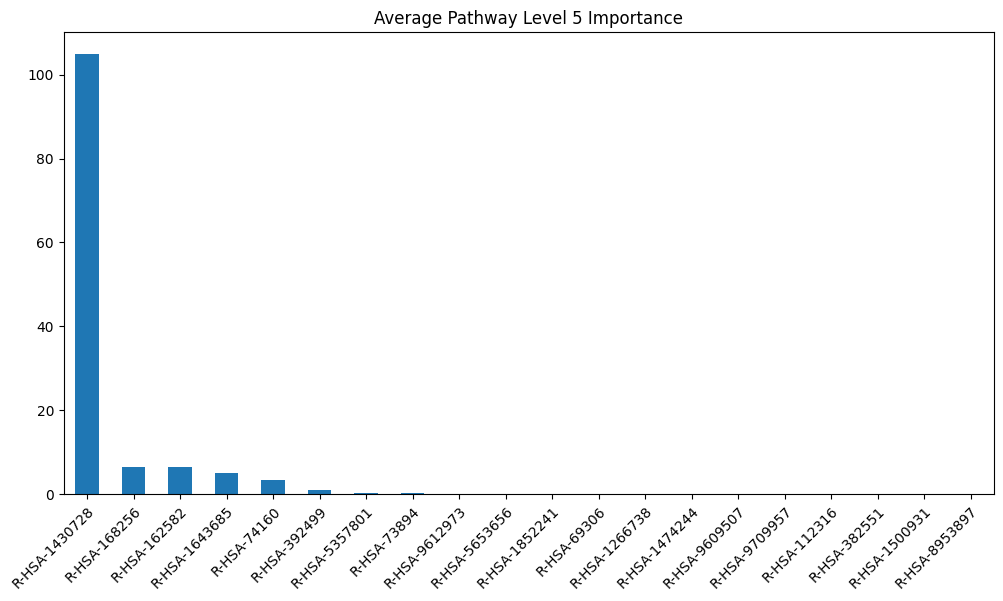

Total = 11.5Gb 	 Reserved = 1.4Gb 	 Allocated = 0.7Gb
Clearing gpu memory
Total = 11.5Gb 	 Reserved = 1.0Gb 	 Allocated = 0.6Gb
GSage_MME(
  (encoder_dims): ModuleList(
    (0): PNET(
      (dropout): Dropout(p=0.5, inplace=False)
      (layers): ModuleList(
        (0): Linear(in_features=464, out_features=723, bias=True)
        (1): MaskedLinear(in_features=723, out_features=1613, bias=True)
        (2): MaskedLinear(in_features=1613, out_features=1107, bias=True)
        (3): MaskedLinear(in_features=1107, out_features=488, bias=True)
        (4): MaskedLinear(in_features=488, out_features=159, bias=True)
        (5): MaskedLinear(in_features=159, out_features=28, bias=True)
      )
      (skip): ModuleList(
        (0): Linear(in_features=723, out_features=32, bias=True)
        (1): Linear(in_features=1613, out_features=32, bias=True)
        (2): Linear(in_features=1107, out_features=32, bias=True)
        (3): Linear(in_features=488, out_features=32, bias=True)
        (4): Lin

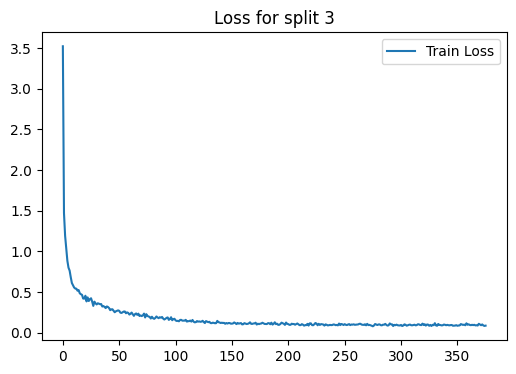

Fold : 4 | Test Accuracy = 0.8419 | F1 = 0.7926 
Save Path Not Found - Plots will not be saved


<Figure size 640x480 with 0 Axes>

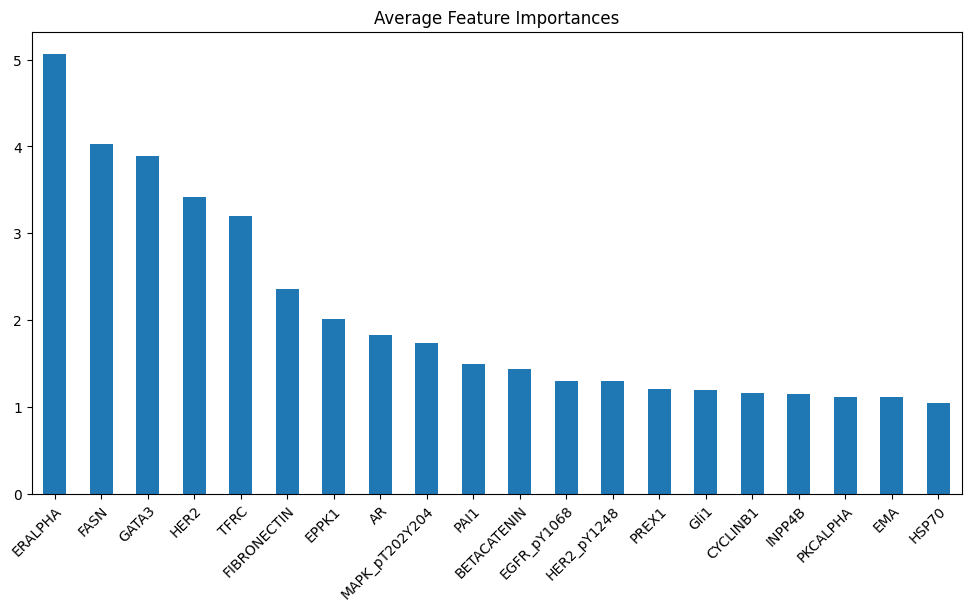

Linear(in_features=464, out_features=723, bias=True)
MaskedLinear(in_features=723, out_features=1613, bias=True)
MaskedLinear(in_features=1613, out_features=1107, bias=True)
MaskedLinear(in_features=1107, out_features=488, bias=True)
MaskedLinear(in_features=488, out_features=159, bias=True)
MaskedLinear(in_features=159, out_features=28, bias=True)


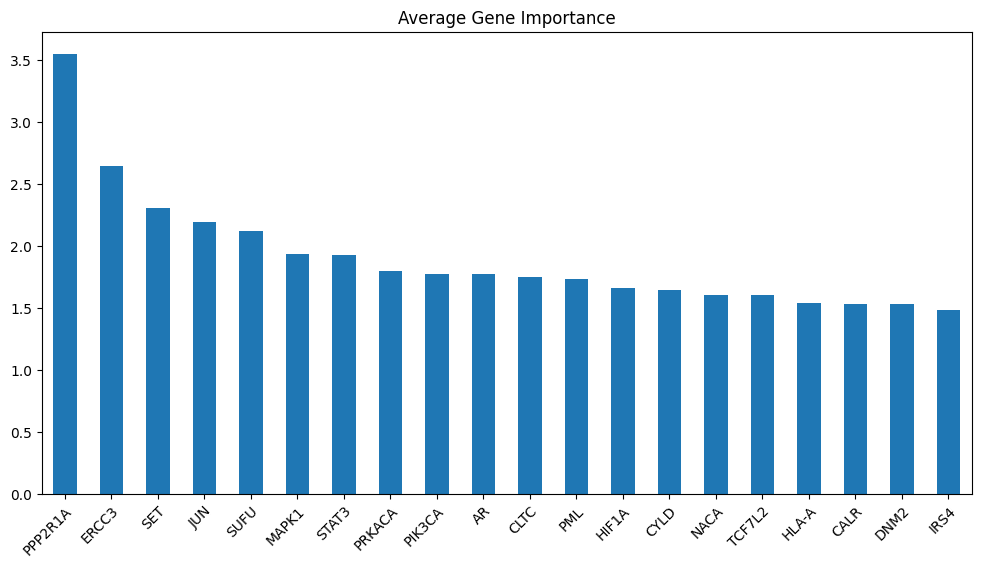

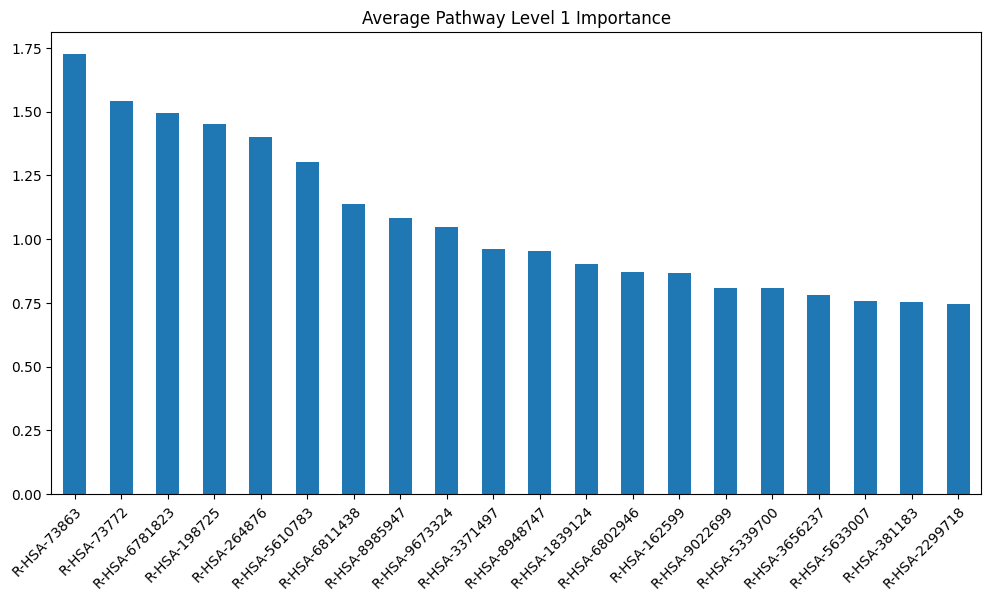

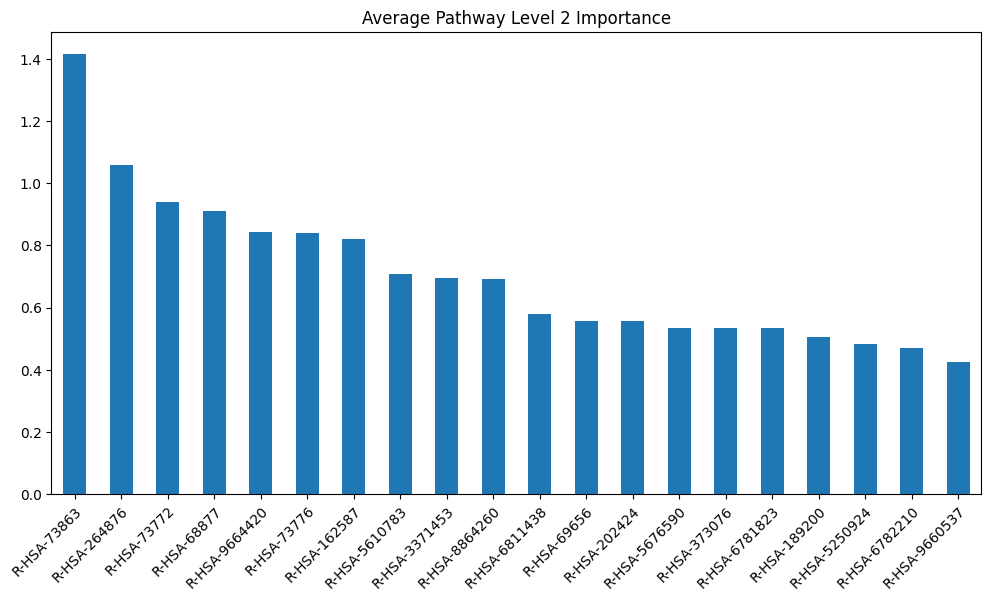

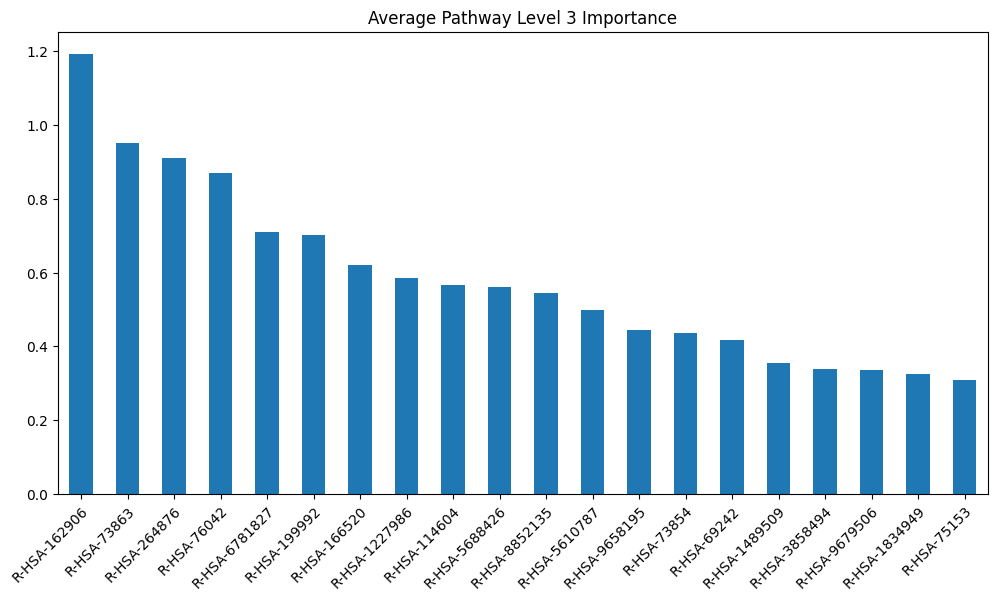

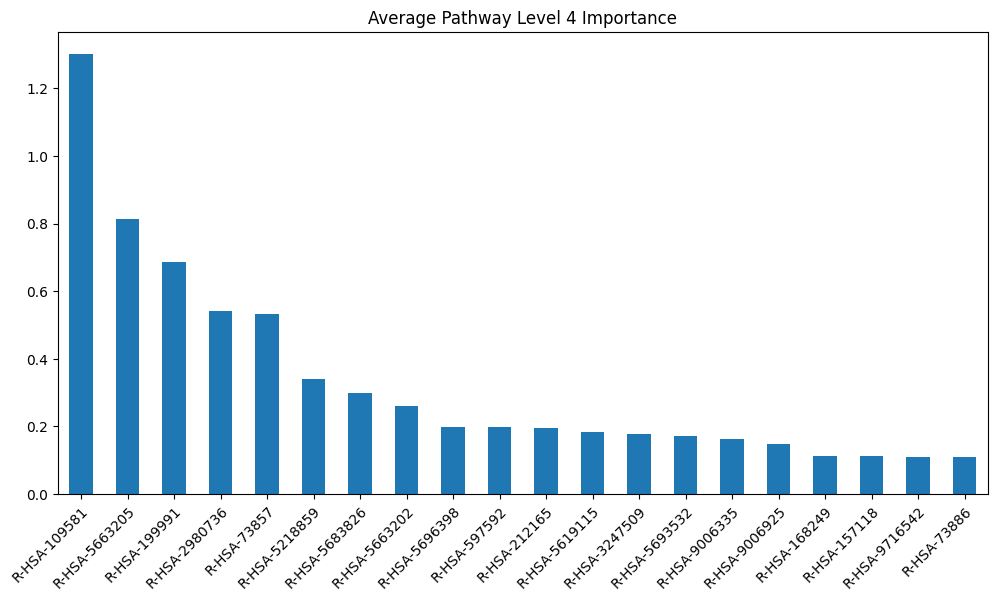

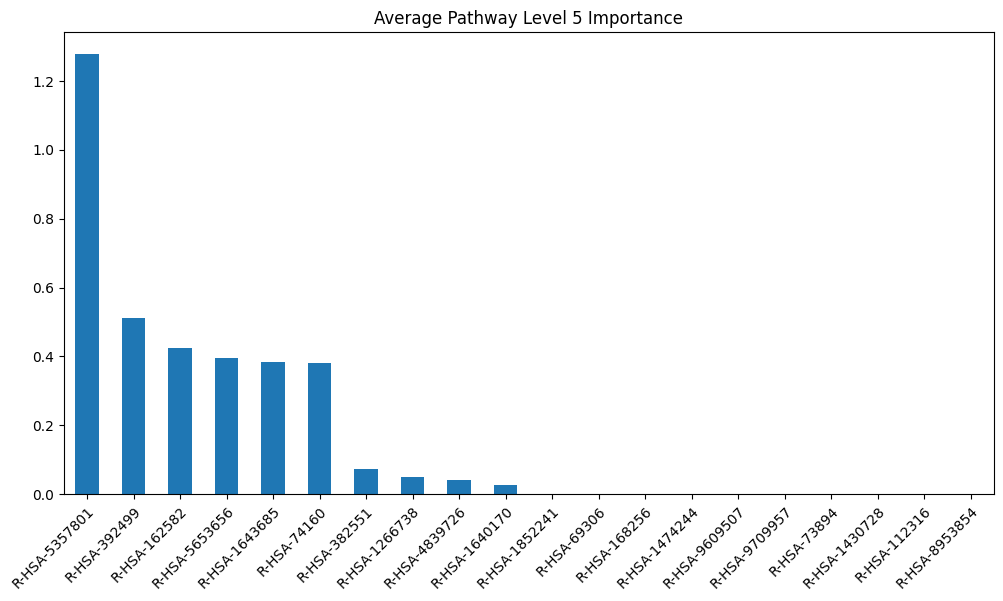

Save Path Not Found - Plots will not be saved


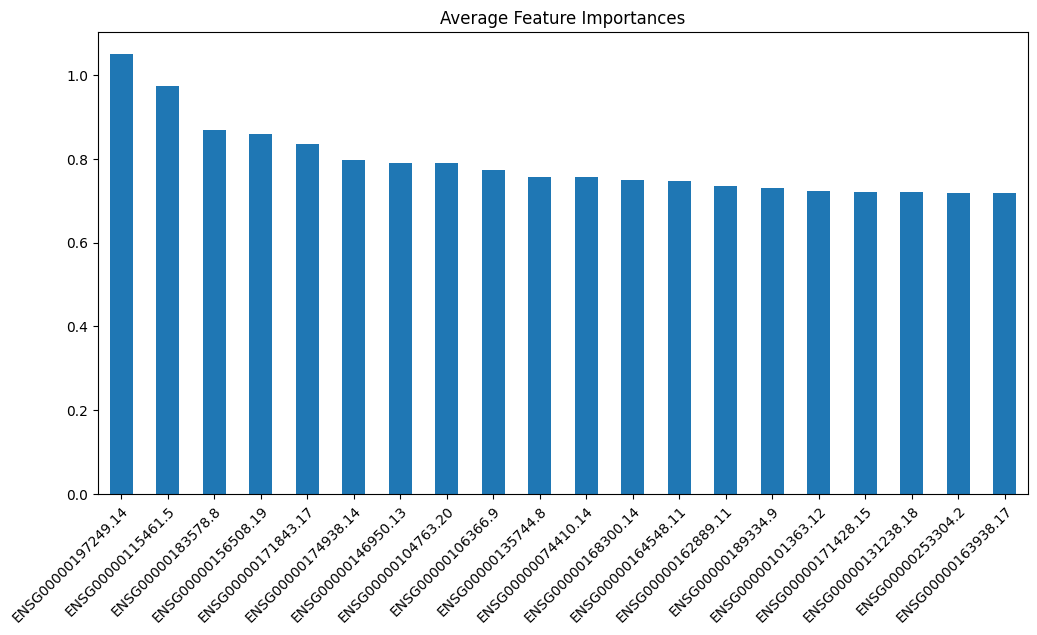

Linear(in_features=29995, out_features=723, bias=True)
MaskedLinear(in_features=723, out_features=1613, bias=True)
MaskedLinear(in_features=1613, out_features=1107, bias=True)
MaskedLinear(in_features=1107, out_features=488, bias=True)
MaskedLinear(in_features=488, out_features=159, bias=True)
MaskedLinear(in_features=159, out_features=28, bias=True)


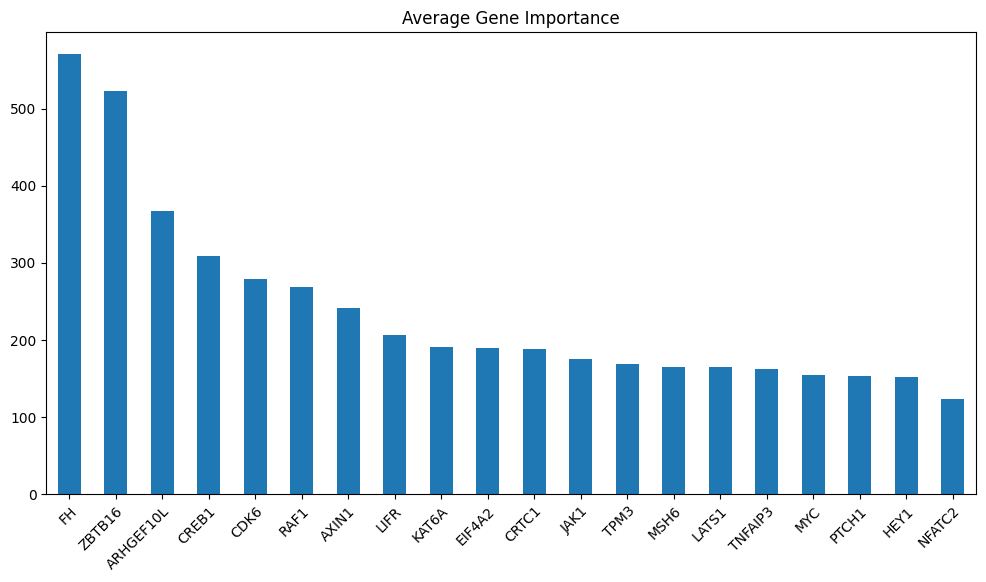

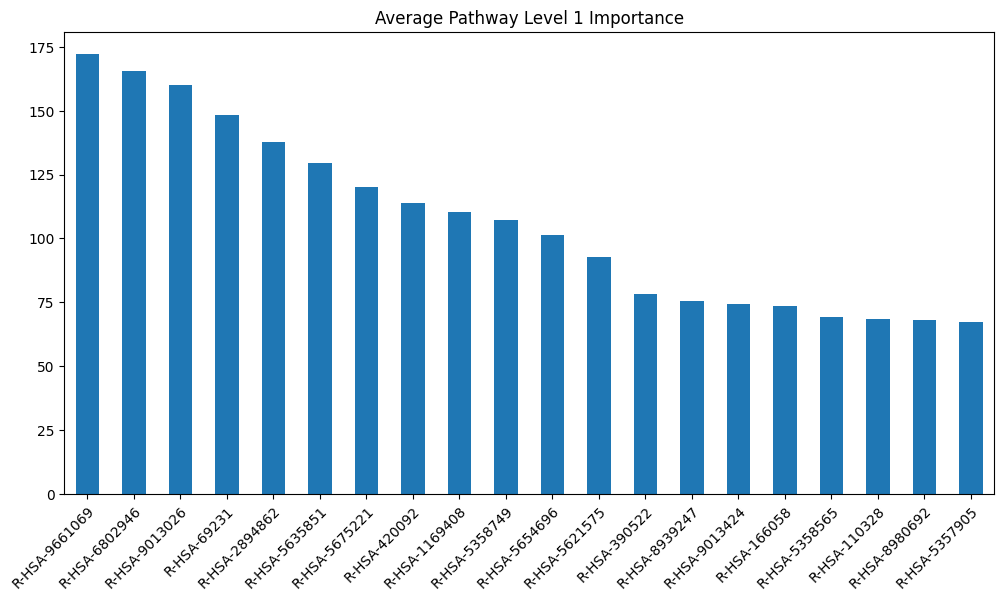

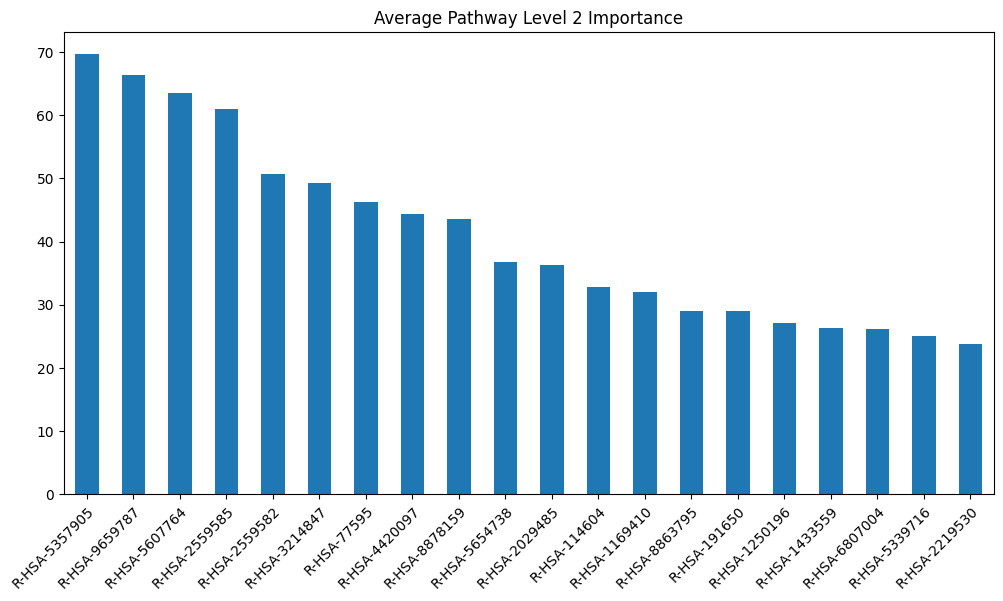

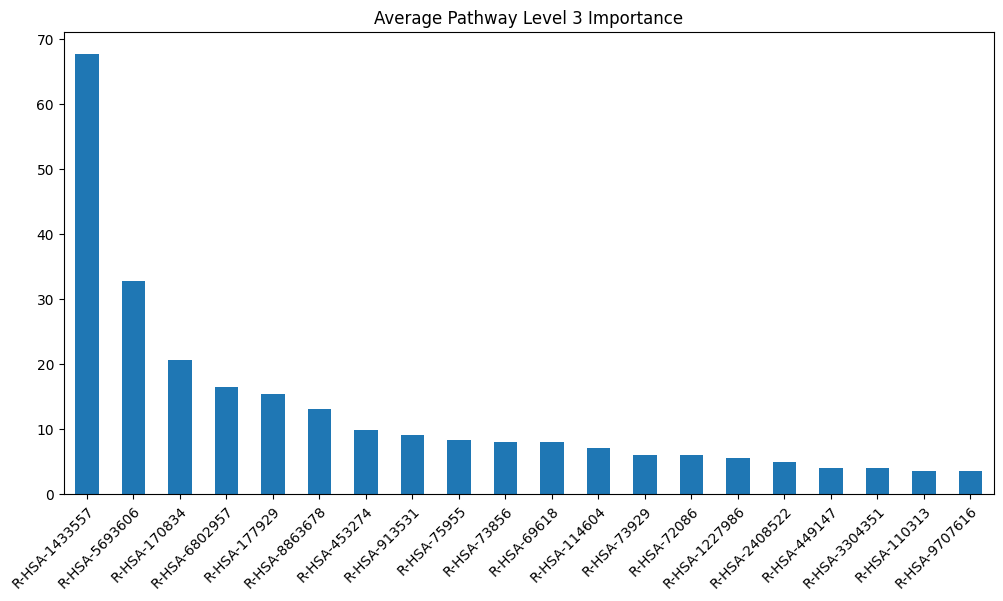

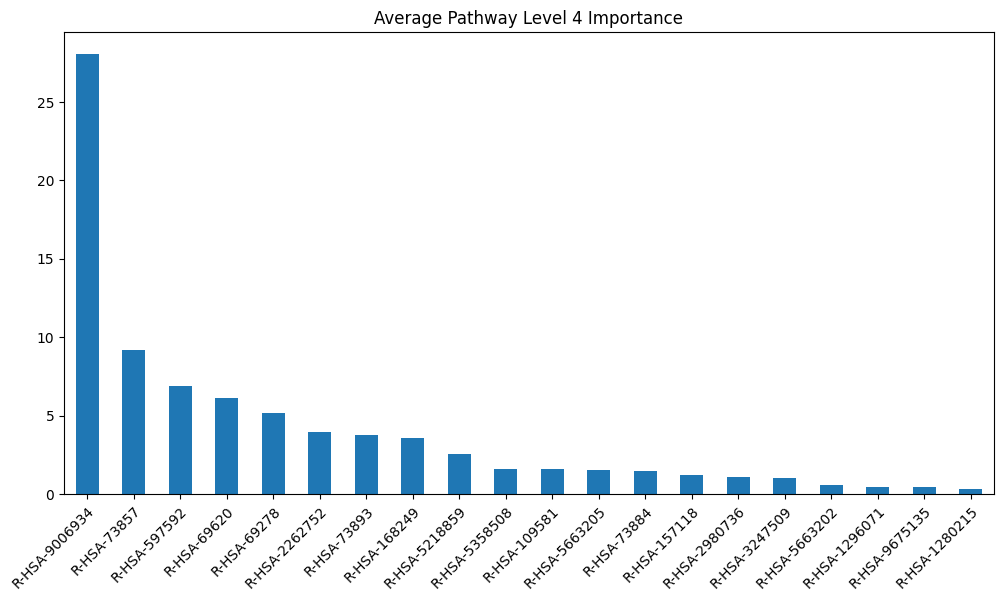

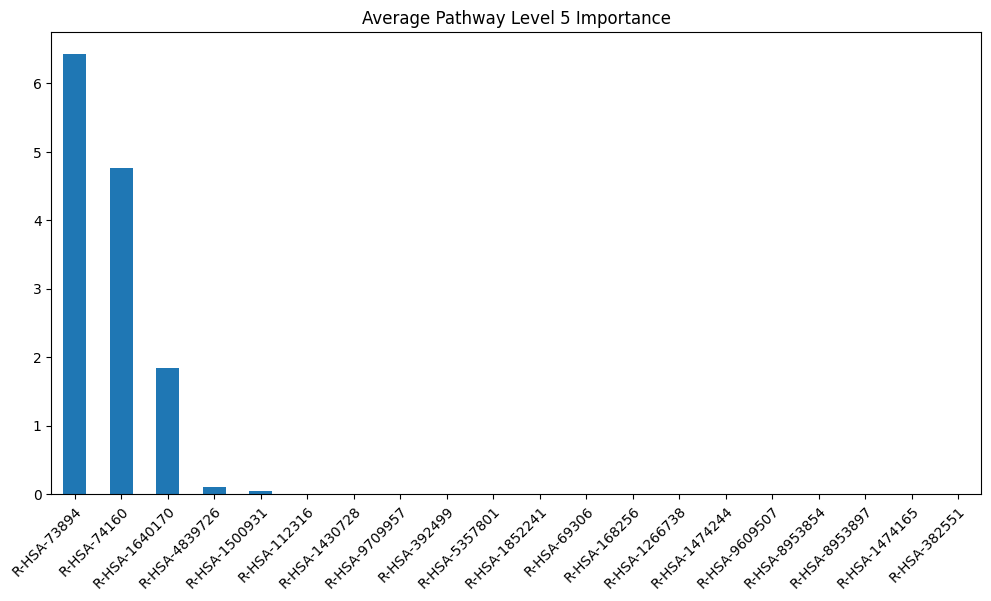

Total = 11.5Gb 	 Reserved = 1.7Gb 	 Allocated = 0.7Gb
Clearing gpu memory
Total = 11.5Gb 	 Reserved = 1.2Gb 	 Allocated = 0.6Gb
GSage_MME(
  (encoder_dims): ModuleList(
    (0): PNET(
      (dropout): Dropout(p=0.5, inplace=False)
      (layers): ModuleList(
        (0): Linear(in_features=464, out_features=723, bias=True)
        (1): MaskedLinear(in_features=723, out_features=1613, bias=True)
        (2): MaskedLinear(in_features=1613, out_features=1107, bias=True)
        (3): MaskedLinear(in_features=1107, out_features=488, bias=True)
        (4): MaskedLinear(in_features=488, out_features=159, bias=True)
        (5): MaskedLinear(in_features=159, out_features=28, bias=True)
      )
      (skip): ModuleList(
        (0): Linear(in_features=723, out_features=32, bias=True)
        (1): Linear(in_features=1613, out_features=32, bias=True)
        (2): Linear(in_features=1107, out_features=32, bias=True)
        (3): Linear(in_features=488, out_features=32, bias=True)
        (4): Lin

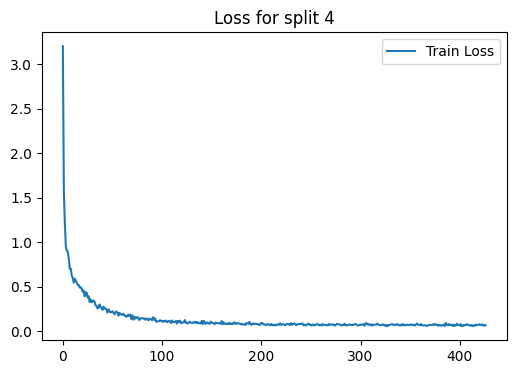

Fold : 5 | Test Accuracy = 0.8372 | F1 = 0.7921 
Save Path Not Found - Plots will not be saved


<Figure size 640x480 with 0 Axes>

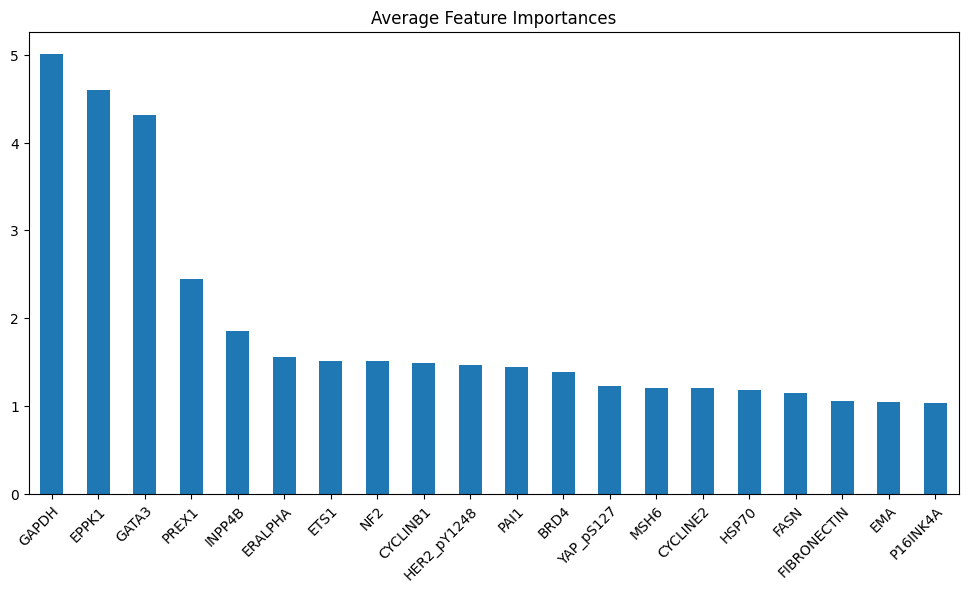

Linear(in_features=464, out_features=723, bias=True)
MaskedLinear(in_features=723, out_features=1613, bias=True)
MaskedLinear(in_features=1613, out_features=1107, bias=True)
MaskedLinear(in_features=1107, out_features=488, bias=True)
MaskedLinear(in_features=488, out_features=159, bias=True)
MaskedLinear(in_features=159, out_features=28, bias=True)


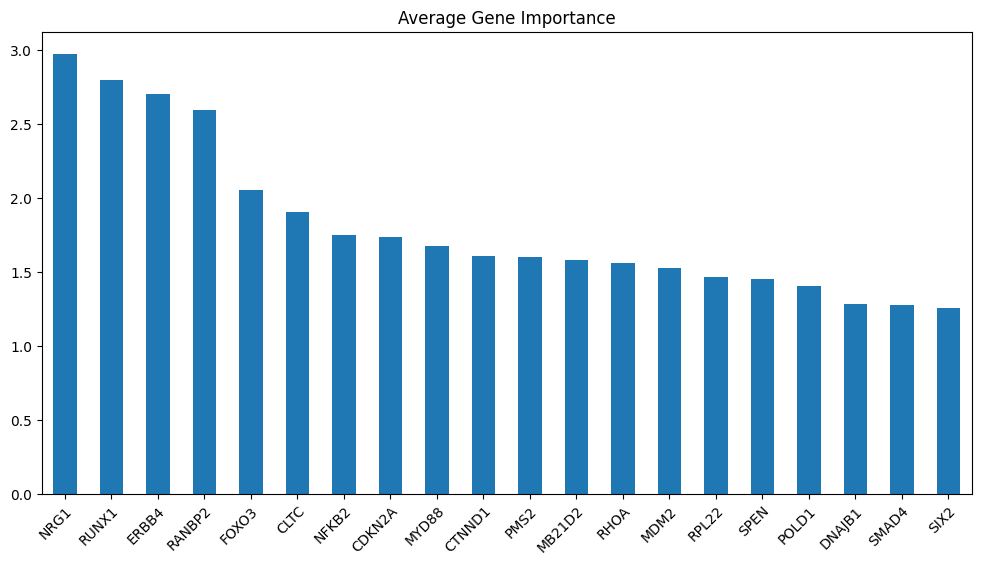

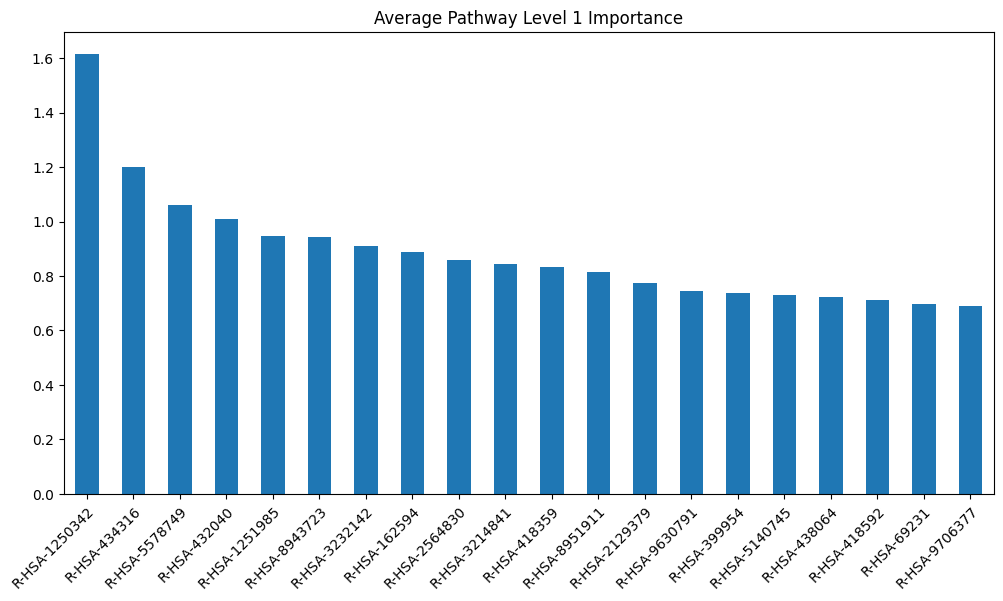

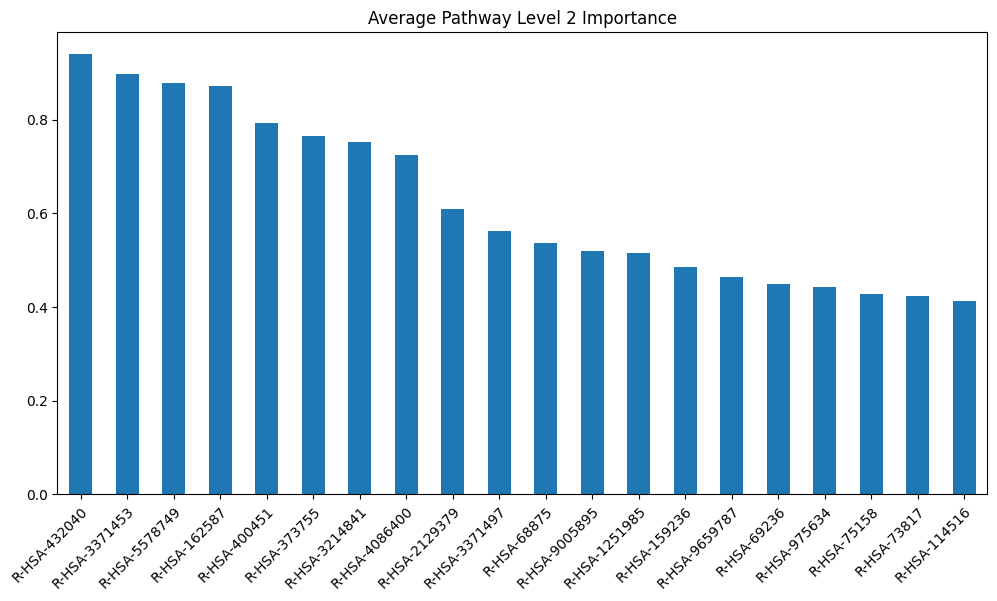

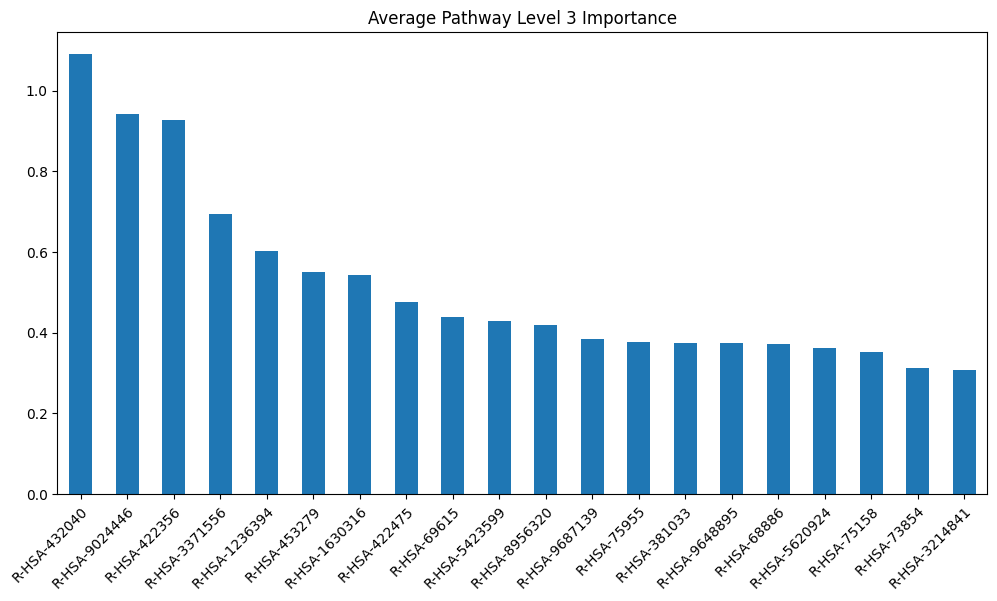

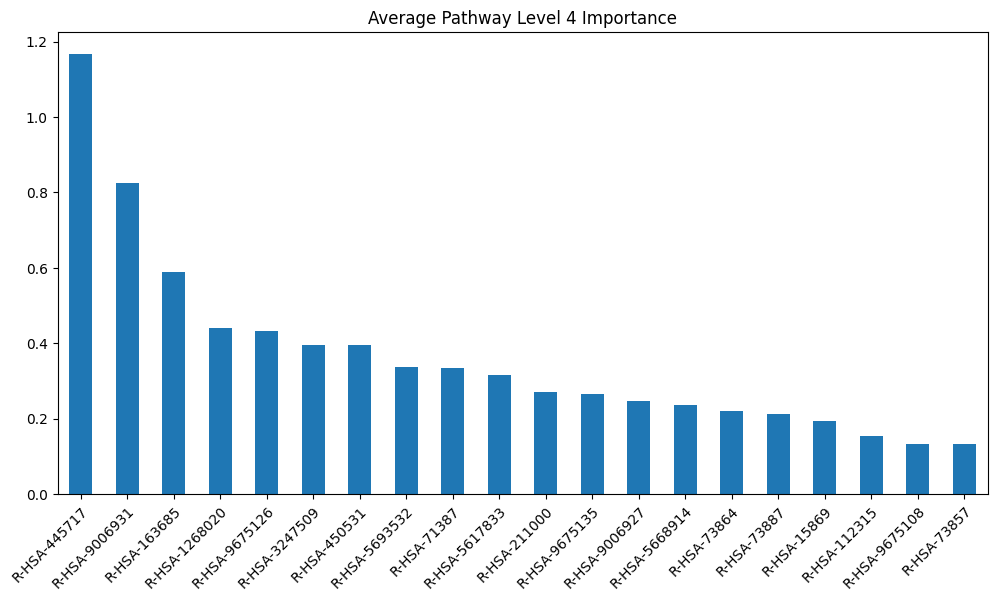

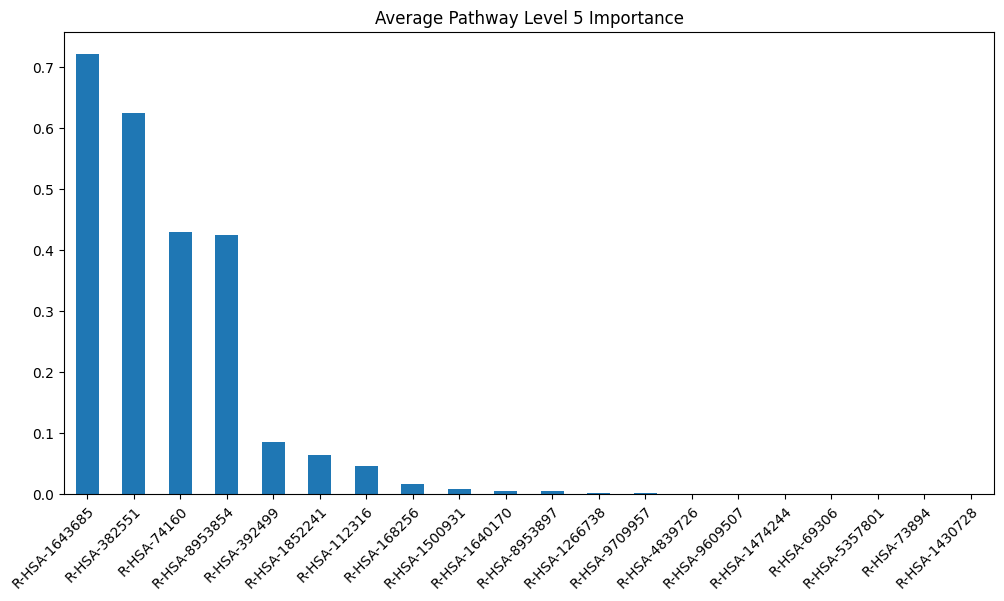

Save Path Not Found - Plots will not be saved


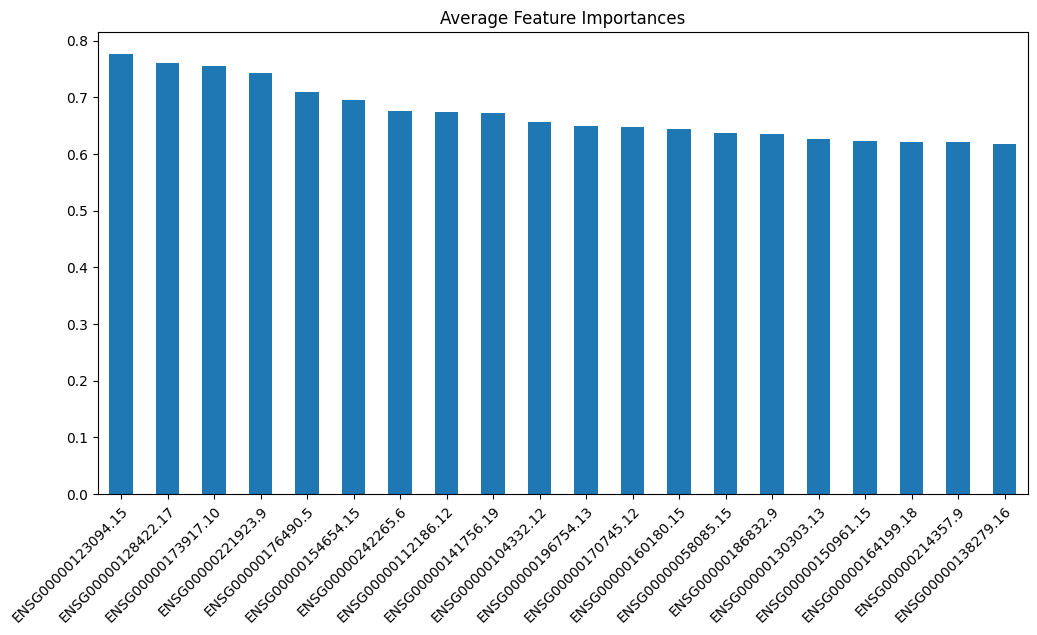

Linear(in_features=29995, out_features=723, bias=True)
MaskedLinear(in_features=723, out_features=1613, bias=True)
MaskedLinear(in_features=1613, out_features=1107, bias=True)
MaskedLinear(in_features=1107, out_features=488, bias=True)
MaskedLinear(in_features=488, out_features=159, bias=True)
MaskedLinear(in_features=159, out_features=28, bias=True)


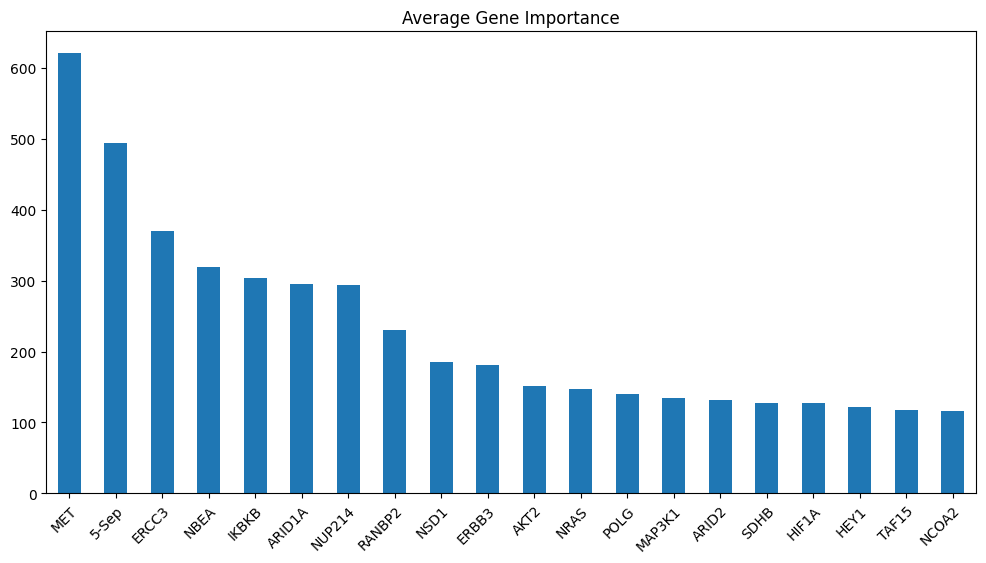

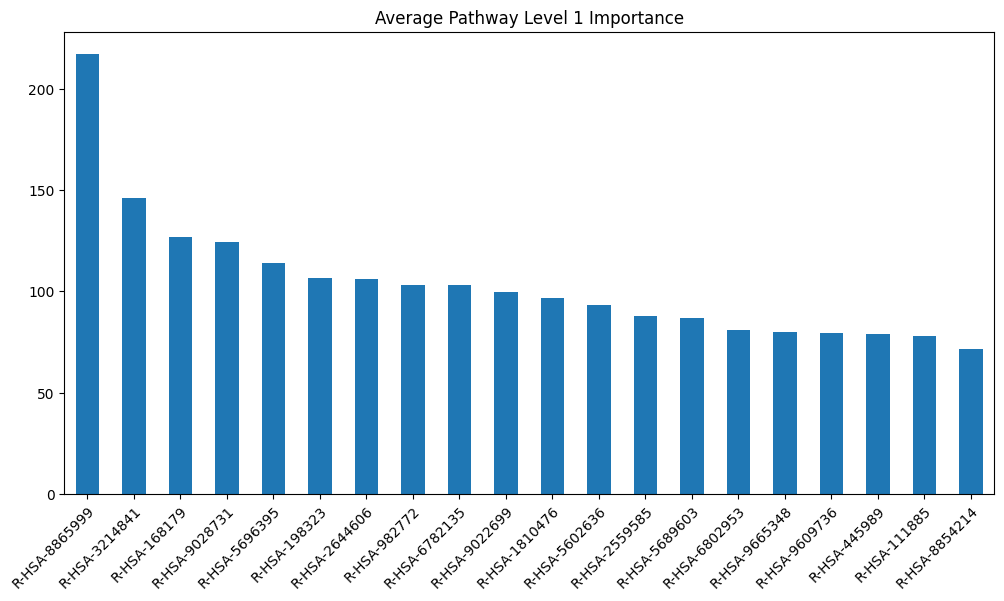

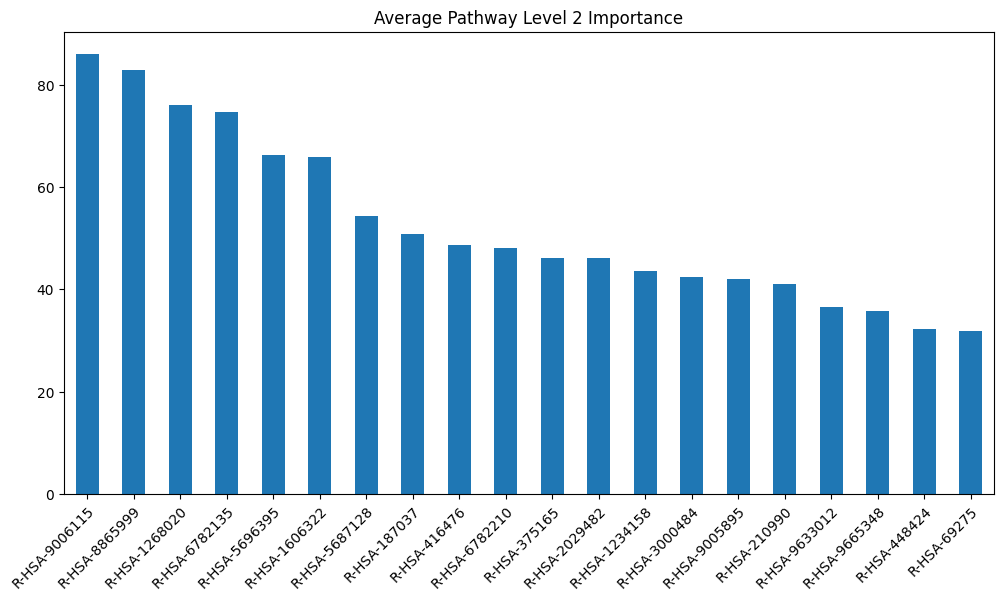

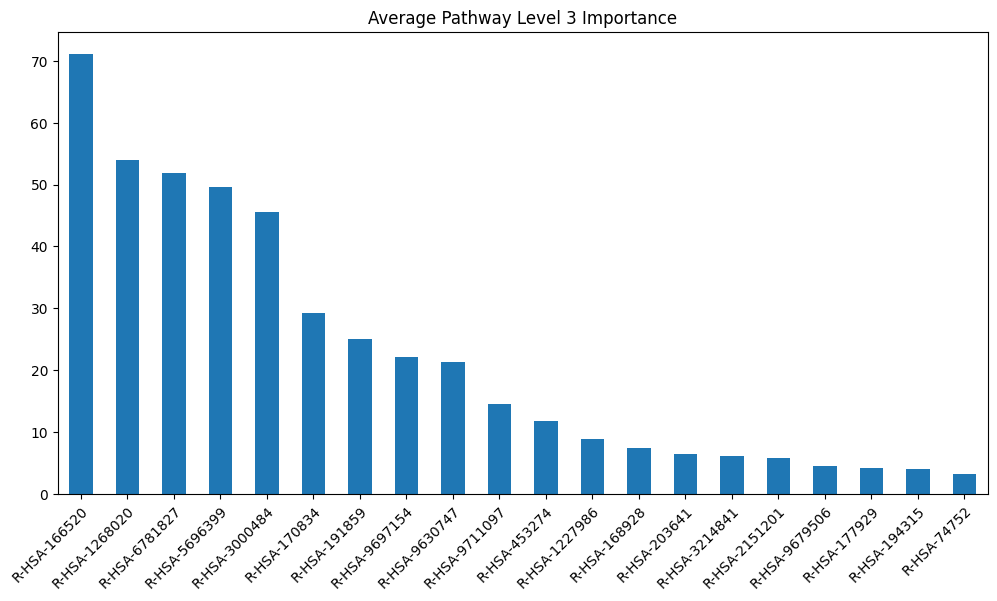

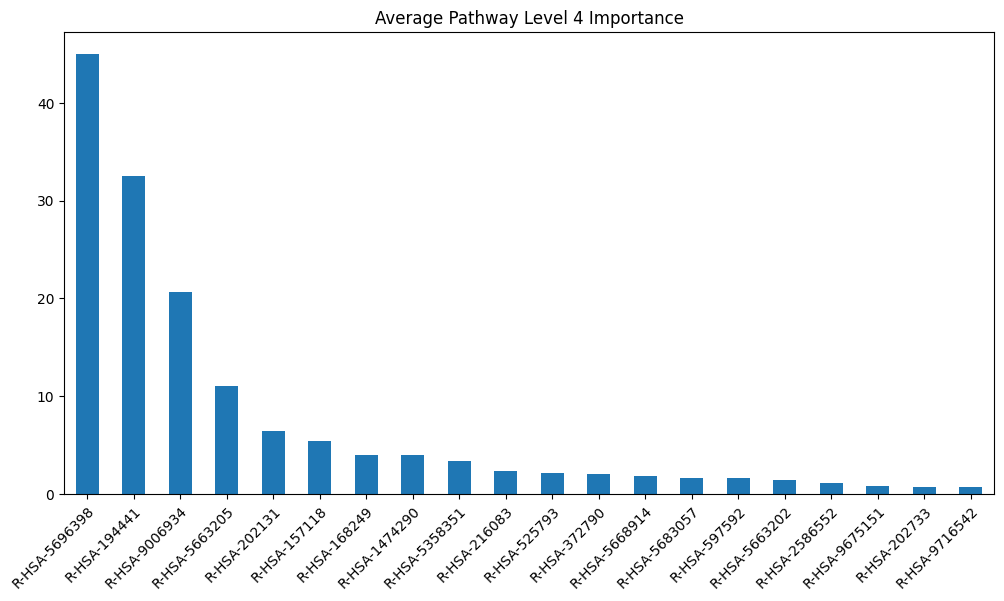

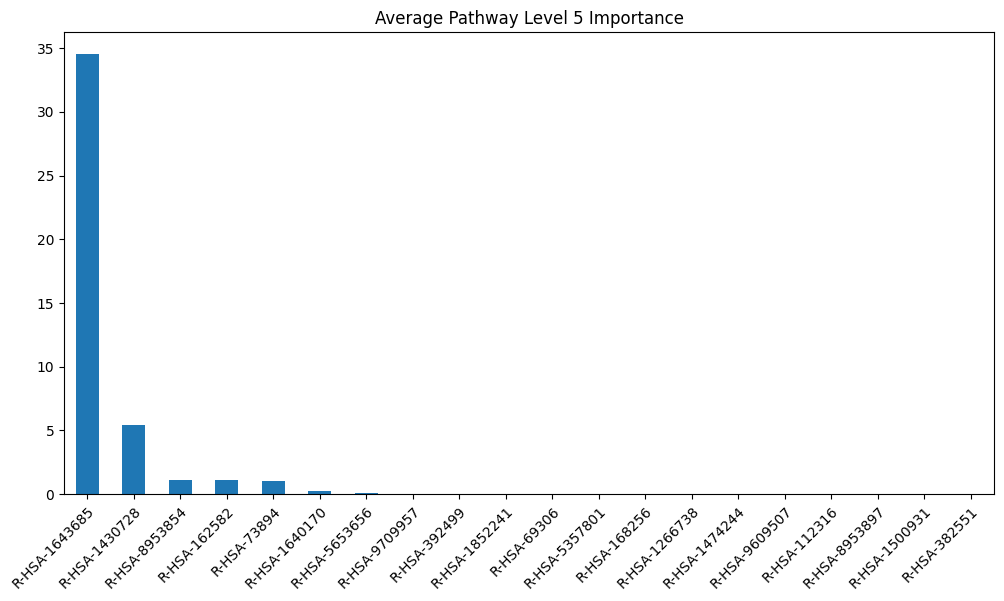

Total = 11.5Gb 	 Reserved = 1.8Gb 	 Allocated = 0.7Gb
Clearing gpu memory
Total = 11.5Gb 	 Reserved = 1.0Gb 	 Allocated = 0.6Gb
5 Fold Cross Validation Accuracy = 84.94 ± 0.96
5 Fold Cross Validation F1 = 80.97 ± 1.55


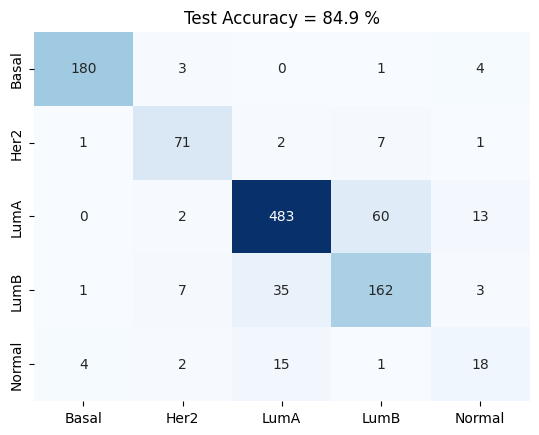

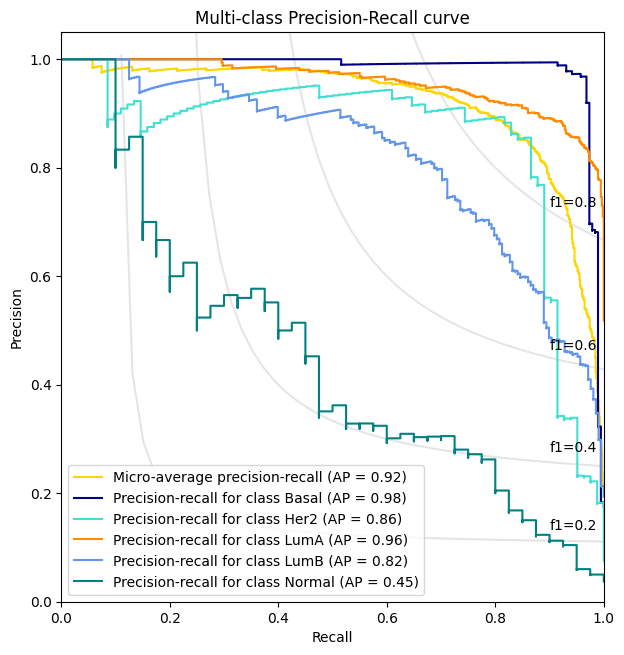

In [20]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')# Get GPU device name, else use CPU
print("Using %s device" % device)
get_gpu_memory()

datModalities , meta = data_parsing(data_input , ['RPPA', 'mRNA' ] , target , index_col)
if interpret_feat : 
    features = {}
    for i , mod in enumerate(datModalities) : 
        features[i] = list(datModalities[mod].columns)

graph_file = data_input + '../Networks/' + snf_net
g = nx.read_graphml(graph_file)

meta = meta.loc[sorted(meta.index)]
label = F.one_hot(torch.Tensor(list(meta.astype('category').cat.codes)).to(torch.int64))

skf = StratifiedKFold(n_splits=5 , shuffle=True) 

print(skf)

MME_input_shapes = [ datModalities[mod].shape[1] for mod in datModalities]

h = reduce(merge_dfs , list(datModalities.values()))
h = h.loc[sorted(h.index)]

g = dgl.from_networkx(g , node_attrs=['idx' , 'label'])

g.ndata['feat'] = torch.Tensor(h.to_numpy())

g.ndata['label'] = label

del datModalities
gc.collect()

output_metrics = []
test_logits = []
test_labels = []
for i, (train_index, test_index) in enumerate(skf.split(meta.index, meta)) :

    model = GSage_MME(MME_input_shapes , [16 , 32] , 32 , [16]  , len(meta.unique()), PNet=net).to(device)
    
    print(model)
    print(g)
    
    g = g.to(device)

    loss_plot = train(g, train_index, device ,  model , label , 2000 , 1e-3 , 100)
    plt.title(f'Loss for split {i}')
    plt.show()
    plt.clf()
    
    sampler = NeighborSampler(
        [15 for i in range(len(model.gnnlayers))],  # fanout for each layer
        prefetch_node_feats=['feat'],
        prefetch_labels=['label'],
    )
    test_dataloader = DataLoader(
        g,
        torch.Tensor(test_index).to(torch.int64).to(device),
        sampler,
        device=device,
        batch_size=1024,
        shuffle=True,
        drop_last=False,
        num_workers=0,
        use_uva=False,
    )
    
    test_output_metrics = evaluate(model , g, test_dataloader)

    print(
        "Fold : {:01d} | Test Accuracy = {:.4f} | F1 = {:.4f} ".format(
        i+1 , test_output_metrics[1] , test_output_metrics[2] )
    )
    
    test_logits.extend(test_output_metrics[-2])
    test_labels.extend(test_output_metrics[-1])
    
    output_metrics.append(test_output_metrics)
    if i == 0 : 
        best_model = model
        best_idx = i
    elif output_metrics[best_idx][1] < test_output_metrics[1] : 
        best_model = model
        best_idx   = i

    if interpret_feat : 
        prev_dim = 0
        for i_int , (pnet , dim) in enumerate(zip(model.encoder_dims , model.input_dims)) : 
            
            pnet.features = features[i_int]
            
            x = g.ndata['feat'][torch.Tensor(test_index).to(device).to(torch.int) , prev_dim:dim+prev_dim]
        
            if i_int == 0 :
                model_importances_cv = interpret(pnet , x , savedir='None')
                for layer in model_importances_cv.keys() : 
                    model_importances_cv[layer] = model_importances_cv[layer].fillna(0)
            else : 
                model_importances_tmp = interpret(pnet , x , savedir='None')
                for layer in model_importances_cv.keys() : 
                    model_importances_tmp[layer] = model_importances_tmp[layer].fillna(0)
                    if layer == 'Features' : 
                        model_importances_cv[layer] = pd.concat([model_importances_cv[layer] , model_importances_tmp[layer]] , axis=1)
                    else : 
                        model_importances_cv[layer] += model_importances_tmp[layer]
        
            prev_dim += dim
            
        model_importances_cv = {k: (v.divide(i_int+1) if k != 'Features' else v) for k, v in model_importances_cv.items()}
        if i == 0 : 
            model_importances = model_importances_cv
        else : 
            for layer in model_importances.keys() :
                model_importances[layer] += model_importances_cv[layer]

    get_gpu_memory()
    del model
    gc.collect()
    torch.cuda.empty_cache()
    print('Clearing gpu memory')
    get_gpu_memory()

test_logits = torch.stack(test_logits)
test_labels = torch.stack(test_labels)
if interpret_feat : 
    model_importances = {k: (v.divide(i_int+1)) for k, v in model_importances.items()}
    
accuracy = []
F1 = []
i = 0
for metric in output_metrics :
    
    accuracy.append(metric[1])
    F1.append(metric[2])


print("%i Fold Cross Validation Accuracy = %2.2f \u00B1 %2.2f" %(5 , np.mean(accuracy)*100 , np.std(accuracy)*100))
print("%i Fold Cross Validation F1 = %2.2f \u00B1 %2.2f" %(5 , np.mean(F1)*100 , np.std(F1)*100))

confusion_matrix(test_logits , test_labels , meta.astype('category').cat.categories)
plt.title('Test Accuracy = %2.1f %%' % (np.mean(accuracy)*100))

precision_recall_plot , all_predictions_conf = AUROC(test_logits, test_labels , meta)

node_predictions = []
node_true        = []
display_label = meta.astype('category').cat.categories
for pred , true in zip(all_predictions_conf.argmax(1) , list(test_labels.detach().cpu().argmax(1).numpy()))  : 
    node_predictions.append(display_label[pred])
    node_true.append(display_label[true])

tst = pd.DataFrame({'Actual' : node_true , 'Predicted' : node_predictions})

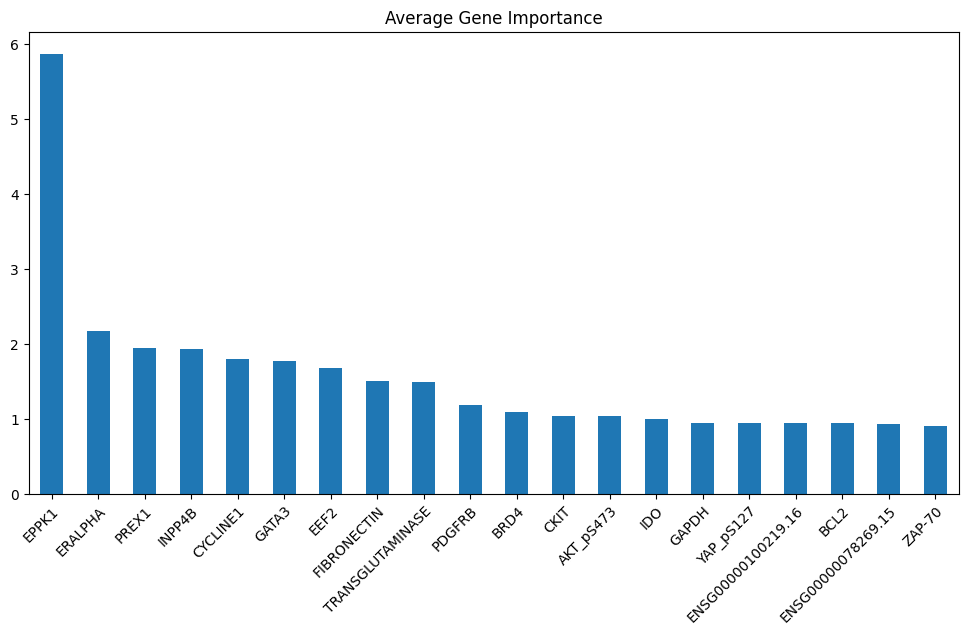

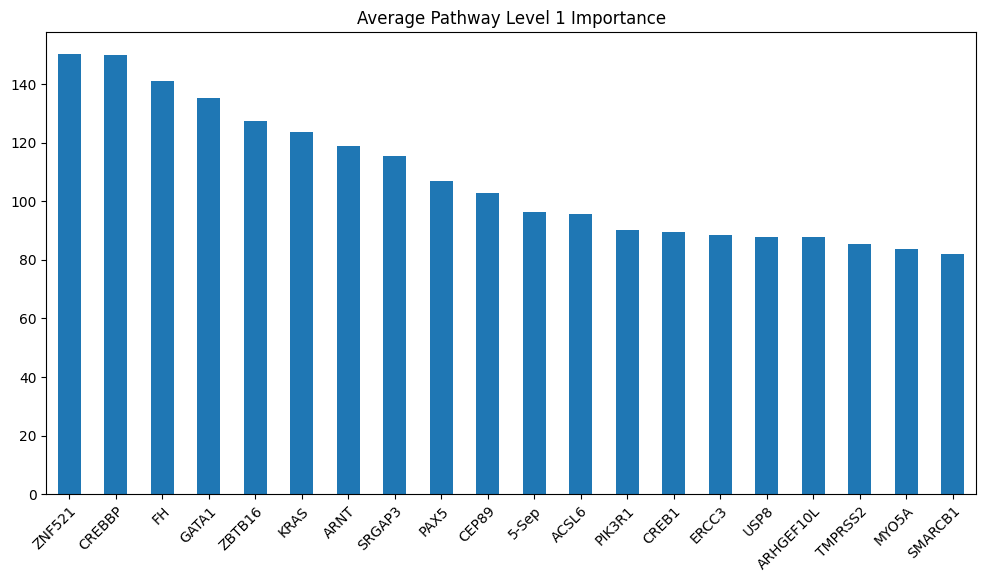

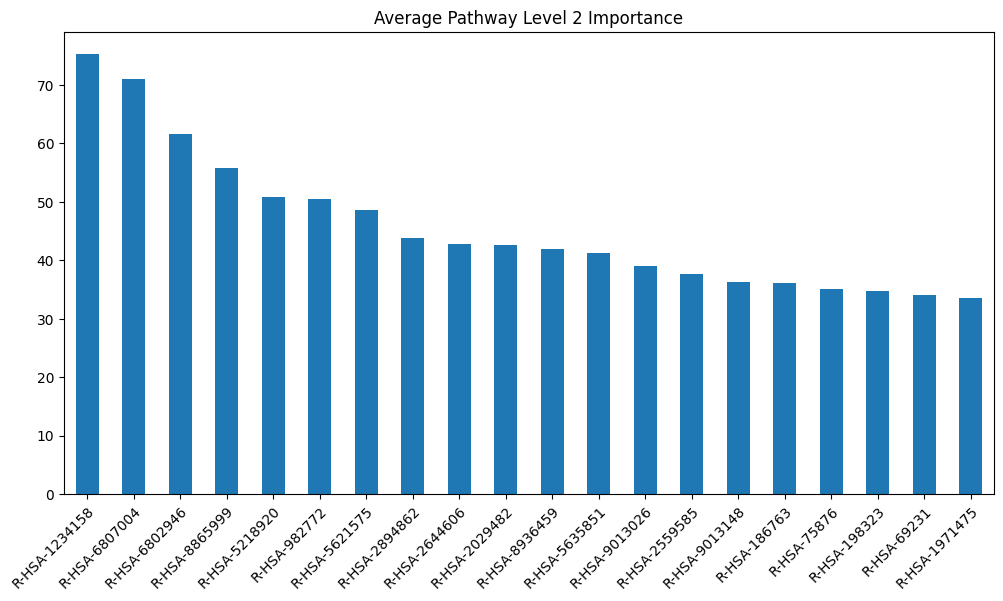

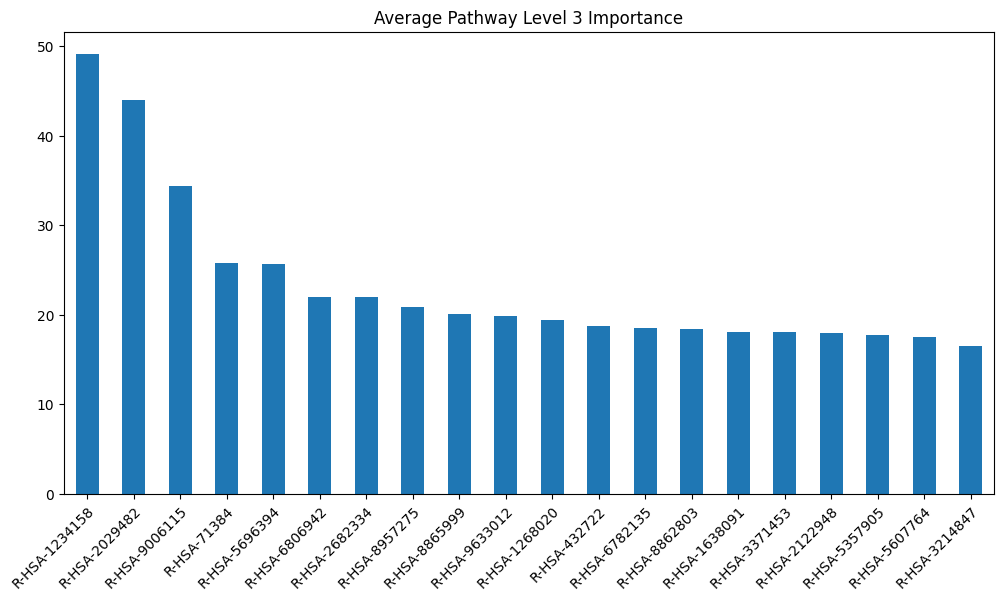

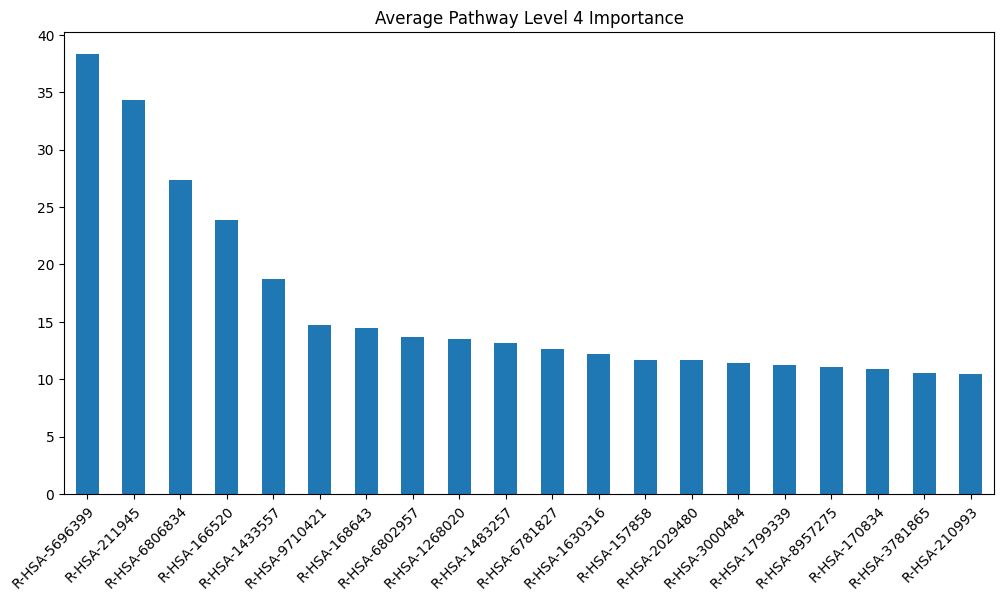

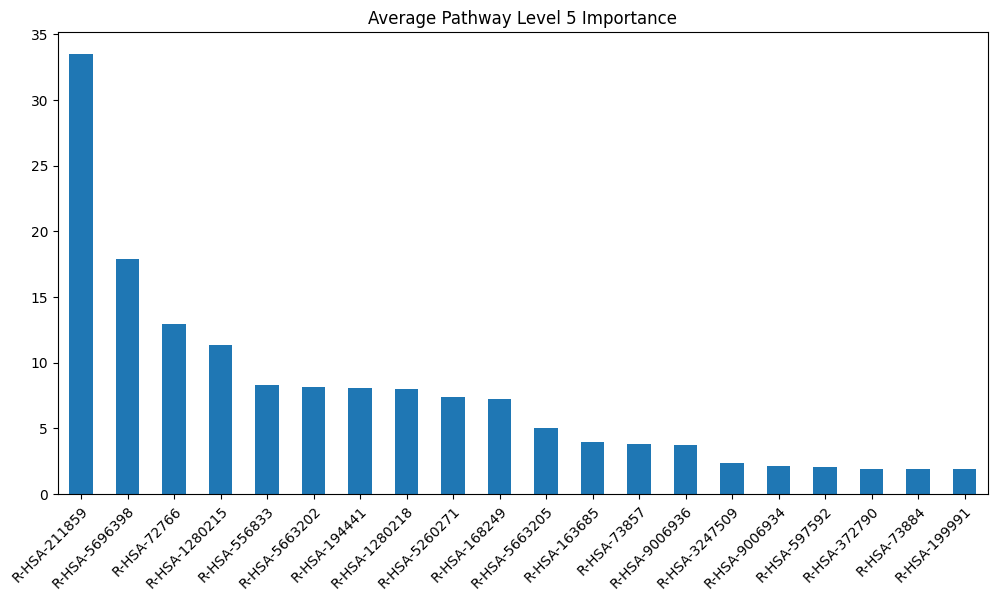

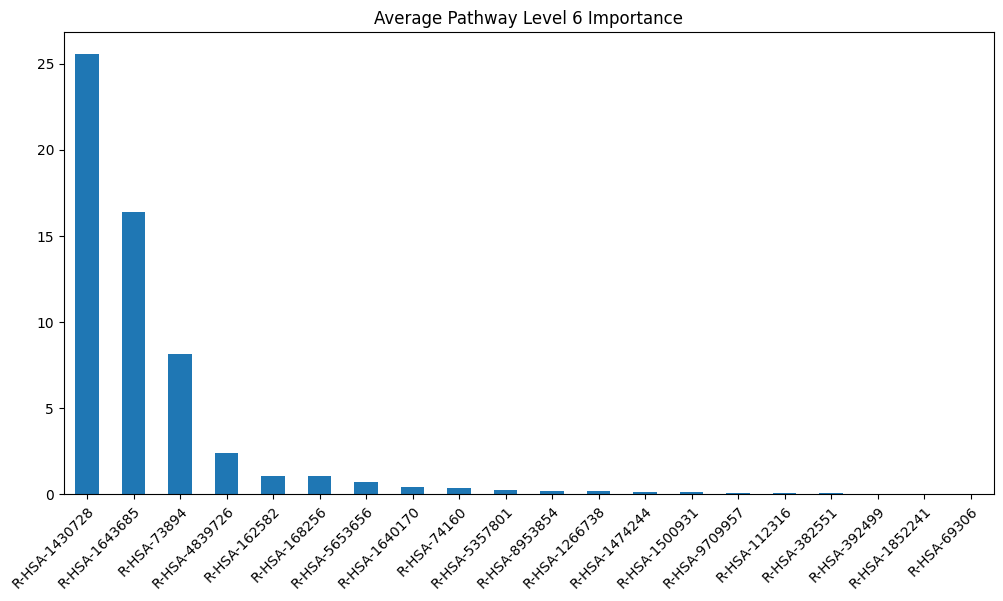

In [21]:
model_layers_importance = {}
model_layers_importance_fig= {}
for i, layer in enumerate(model_importances):
    layer_title = f"Pathway Level {i} Importance" if i > 0 else "Gene Importance"
    model_layers_importance[layer_title] = layer
    model_layers_importance_fig[layer_title] = visualize_importances(
        model_importances[layer], title=f"Average {layer_title}")

In [5]:
get_gpu_memory()
#del model , train_loader , test_loader
torch.cuda.reset_accumulated_memory_stats()
gc.collect()
torch.cuda.empty_cache()
get_gpu_memory()

Total = 11.5Gb 	 Reserved = 1.2Gb 	 Allocated = 0.4Gb
Total = 11.5Gb 	 Reserved = 0.6Gb 	 Allocated = 0.4Gb


In [7]:
# test the model
print("Testing...")
acc = layerwise_infer(
    device, g, np.arange(len(g.nodes())), best_model, batch_size=4096
)
print("Test Accuracy {:.4f}".format(acc.item()))

Testing...


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 88.90it/s]

Test Accuracy 0.9740


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 85.62it/s]


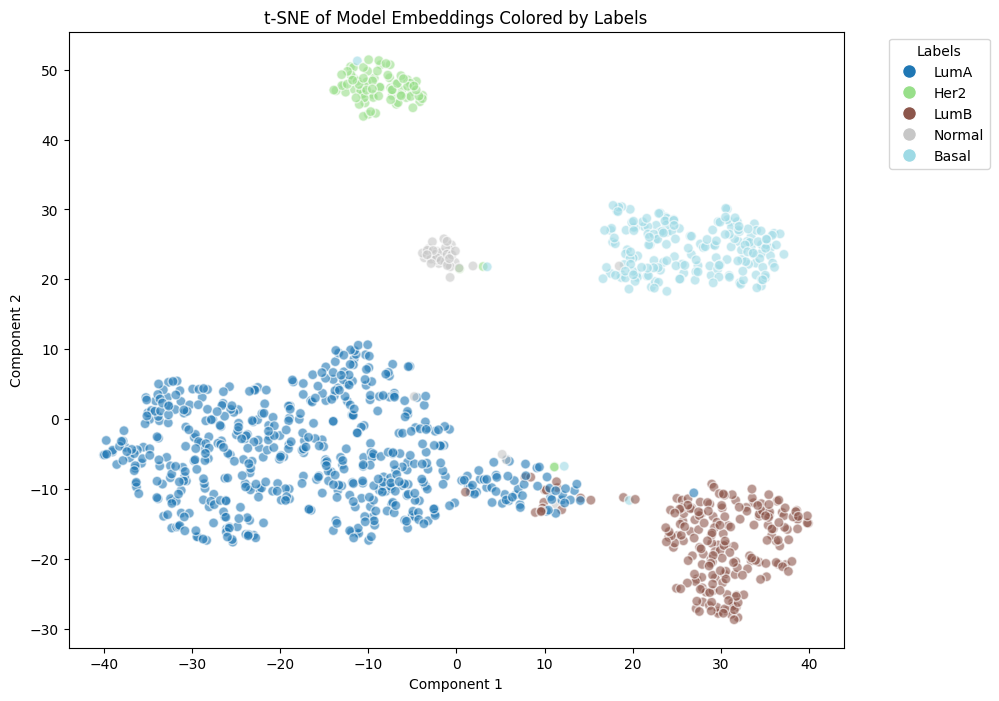

In [8]:
best_model.eval()
with torch.no_grad():
    emb = best_model.embedding_extraction(
        g, g.ndata['feat'] ,device, 4096
    )  # pred in buffer_device

tsne_embedding_plot(emb.detach().cpu().numpy() , meta)

Save Path Not Found - Plots will not be saved


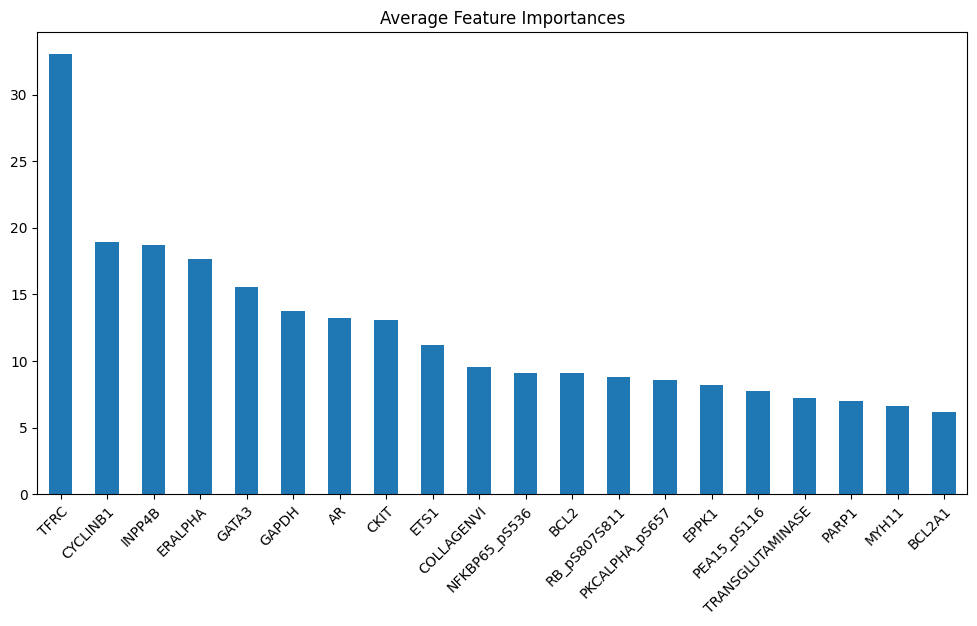

Linear(in_features=464, out_features=723, bias=True)
MaskedLinear(in_features=723, out_features=1613, bias=True)
MaskedLinear(in_features=1613, out_features=1107, bias=True)
MaskedLinear(in_features=1107, out_features=488, bias=True)
MaskedLinear(in_features=488, out_features=159, bias=True)
MaskedLinear(in_features=159, out_features=28, bias=True)


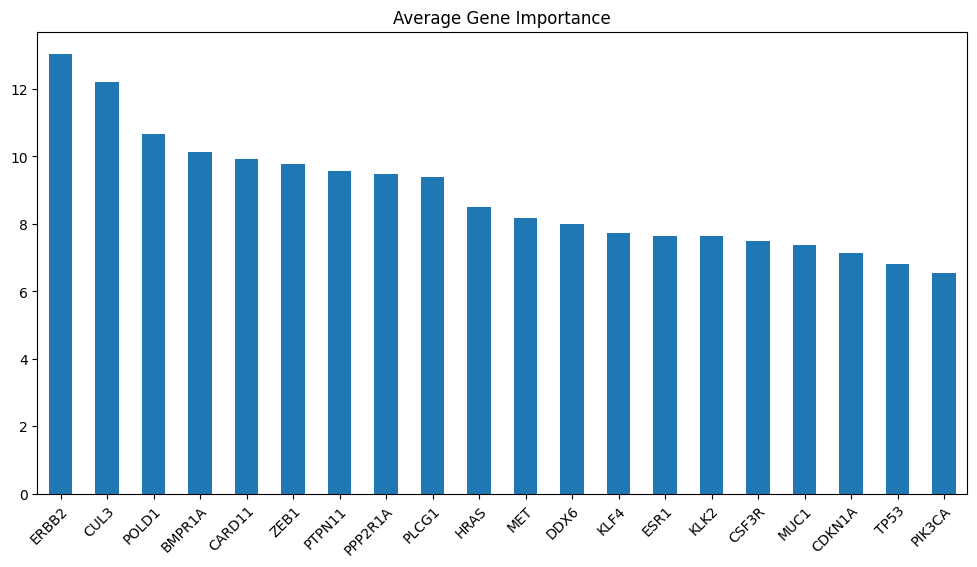

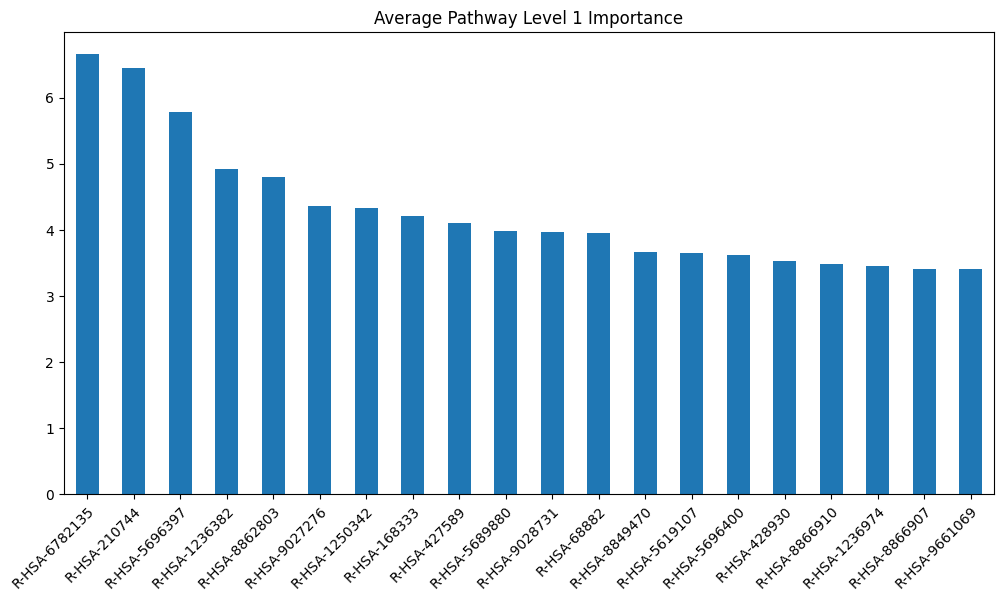

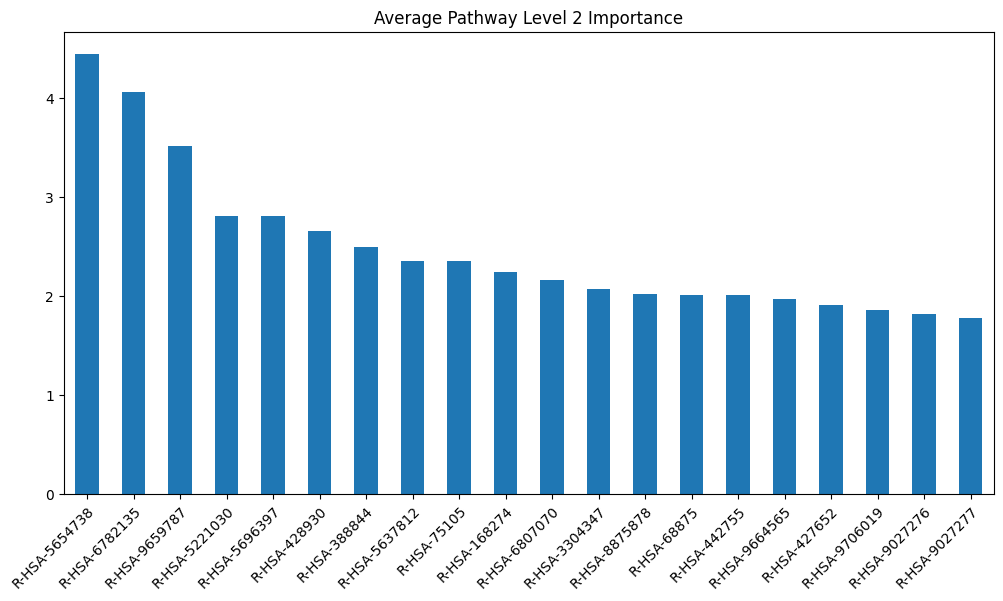

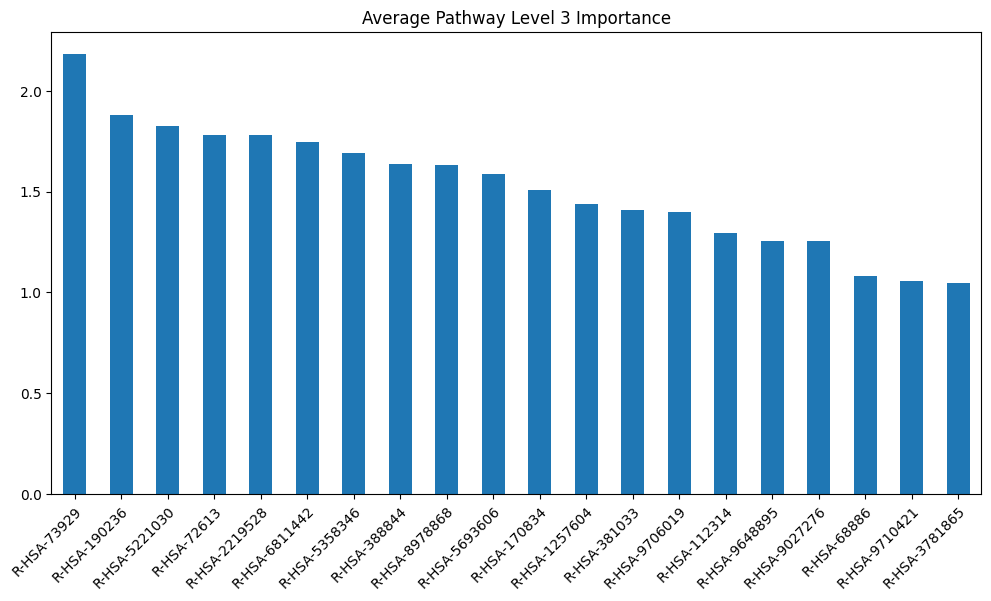

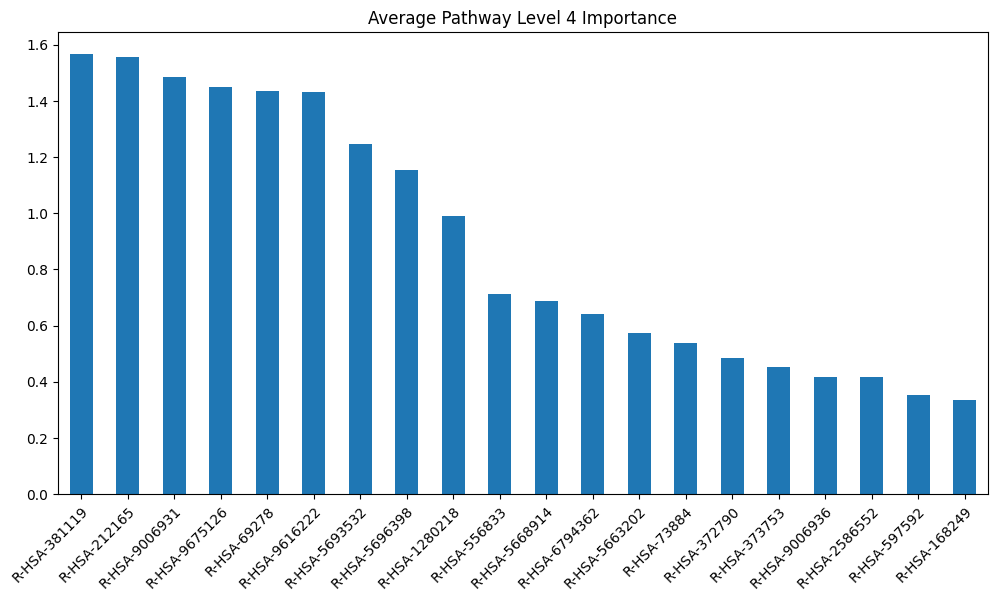

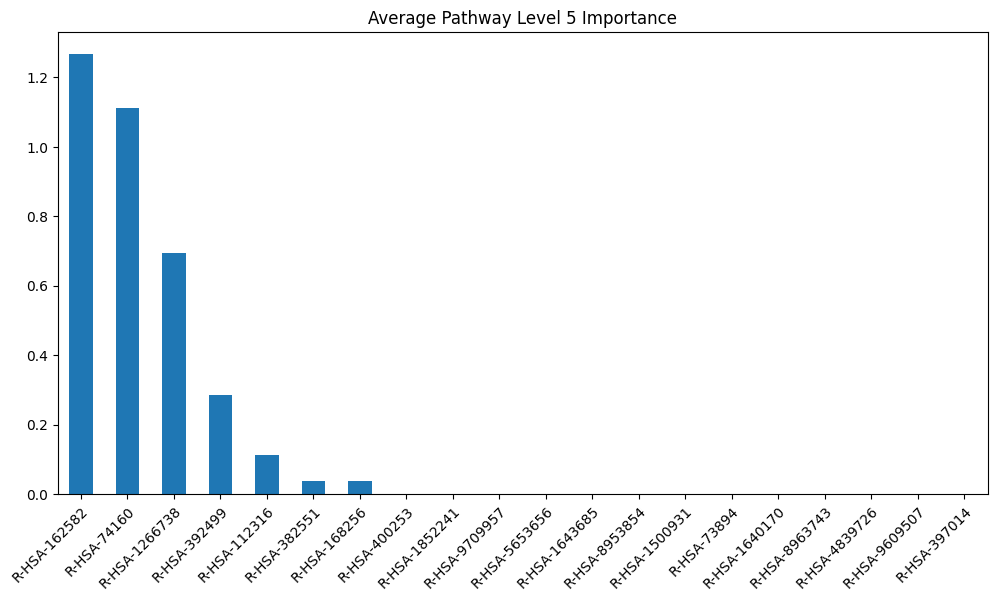

In [9]:
datModalities , meta = data_parsing(data_input , ['RPPA', 'mRNA' ] , target , index_col)

best_model.encoder_dims[0].features = datModalities['RPPA'].columns

h_torch = torch.Tensor(h.values)
x = h_torch[: , :464]
n = x.shape[0]
nan_rows = torch.isnan(x).any(dim=1)
test_data = x[~nan_rows].to(device)

model_importances = interpret(best_model.encoder_dims[0] , test_data , savedir='None')

In [23]:
for pnet in best_model.encoder_dims : 
    print(pnet)

PNET(
  (dropout): Dropout(p=0.5, inplace=False)
  (layers): ModuleList(
    (0): Linear(in_features=464, out_features=723, bias=True)
    (1): MaskedLinear(in_features=723, out_features=1613, bias=True)
    (2): MaskedLinear(in_features=1613, out_features=1107, bias=True)
    (3): MaskedLinear(in_features=1107, out_features=488, bias=True)
    (4): MaskedLinear(in_features=488, out_features=159, bias=True)
    (5): MaskedLinear(in_features=159, out_features=28, bias=True)
  )
  (skip): ModuleList(
    (0): Linear(in_features=723, out_features=32, bias=True)
    (1): Linear(in_features=1613, out_features=32, bias=True)
    (2): Linear(in_features=1107, out_features=32, bias=True)
    (3): Linear(in_features=488, out_features=32, bias=True)
    (4): Linear(in_features=159, out_features=32, bias=True)
    (5): Linear(in_features=28, out_features=32, bias=True)
  )
  (act_layers): ModuleList(
    (0-5): 6 x ReLU()
  )
  (norm_layers): ModuleList(
    (0): BatchNorm1d(723, eps=1e-05, momen

In [20]:
model_importances

{'Features':      1433BETA  1433EPSILON  1433ZETA     4EBP1  4EBP1_pS65  4EBP1_pT37T46  \
 0    0.004003    -0.001483 -0.000075 -0.004171   -0.010003       0.015964   
 1    0.000498    -0.001832 -0.000156 -0.001824   -0.011288       0.030925   
 2    0.000824    -0.001711 -0.000234 -0.001153   -0.010803       0.026126   
 3   -0.000985    -0.002733  0.002822 -0.000201   -0.012309       0.000675   
 4   -0.000194     0.000547  0.001548  0.010480   -0.001030      -0.011401   
 ..        ...          ...       ...       ...         ...            ...   
 864  0.016682    -0.000056 -0.001038  0.001680   -0.002643      -0.010329   
 865  0.000484     0.000131  0.003437 -0.001674   -0.006996      -0.002116   
 866  0.000208    -0.003483  0.000048  0.004852   -0.006314      -0.000331   
 867  0.000687     0.000305  0.001467  0.000899   -0.009541       0.007745   
 868  0.000135    -0.000224  0.003735 -0.000002   -0.007766      -0.000091   
 
      4EBP1_pT70     53BP1  ACC_pS79      ACC1  ..

In [18]:
get_gpu_memory()
#del model , train_loader , test_loader
torch.cuda.reset_accumulated_memory_stats()
gc.collect()
torch.cuda.empty_cache()
get_gpu_memory()

Total = 11.5Gb 	 Reserved = 0.9Gb 	 Allocated = 0.5Gb
Total = 11.5Gb 	 Reserved = 0.9Gb 	 Allocated = 0.5Gb


In [19]:
datModalities , meta = data_parsing(data_input , ['RPPA', 'mRNA' ] , target , index_col)

best_model.encoder_dims[1].features = datModalities['mRNA'].columns

h_torch = torch.Tensor(h.values)
x = h_torch[: , 464:]
n = x.shape[0]
nan_rows = torch.isnan(x).any(dim=1)
test_data = x[~nan_rows].to(device)

#model_importances = interpret(best_model.encoder_dims[1] , test_data , savedir='None')

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.
